In [24]:
from matplotlib import rcParams 
from matplotlib.pyplot import subplots 
from matplotlib.pyplot import show, close  
from pandas import read_csv, DataFrame 
from IPython.display import display, Markdown

rcParams.update({
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.1,
})

LANGUAGE = 'es' 
WINDOW = 20 
FIGURES  = './assets' 
PATH = {
    'ViT': {
        'S' : "./logs/ViT-s42-p=0.3-hdim=128-imgz=32x32-dim=64-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv",
        'M' : "./logs/ViT-s42-p=0.3-hdim=256-imgz=32x32-dim=64-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv",
        'L' : "./logs/ViT-s42-p=0.4-hdim=256-imgz=32x32-dim=128-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv"
    }, 

    'SwiGLUViT': {
        'S' : "./logs/SwiGLUViT-s42-p=0.3-hdim=128-imgz=32x32-dim=64-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv",
        'M' : "./logs/SwiGLUViT-s42-p=0.3-hdim=256-imgz=32x32-dim=64-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv",
        'L' : "./logs/SwiGLUViT-s42-p=0.4-hdim=256-imgz=32x32-dim=128-number_of_channels=3-ncls=10-nhead=4-nlayer=4-pz=4x4.csv"
    }
}
 

In [25]:
dataframe = read_csv(PATH['ViT']['S']) 
dataframe = dataframe.sort_values(by='epoch')
display(Markdown("### ViT"))
display(dataframe)

### ViT

,epoch,phase,loss,accuracy,lr
0,0,train,2.019942,0.23928,0.00030
1,0,evaluation,1.834864,0.32820,0.00030
2,1,train,1.838412,0.30610,0.00030
3,1,evaluation,1.744310,0.35390,0.00030
4,2,train,1.761149,0.33904,0.00030
...,...,...,...,...,...
595,297,evaluation,0.775837,0.73830,0.00001
596,298,train,0.885643,0.68490,0.00001
597,298,evaluation,0.769063,0.73850,0.00001
598,299,train,0.884900,0.68502,0.00001


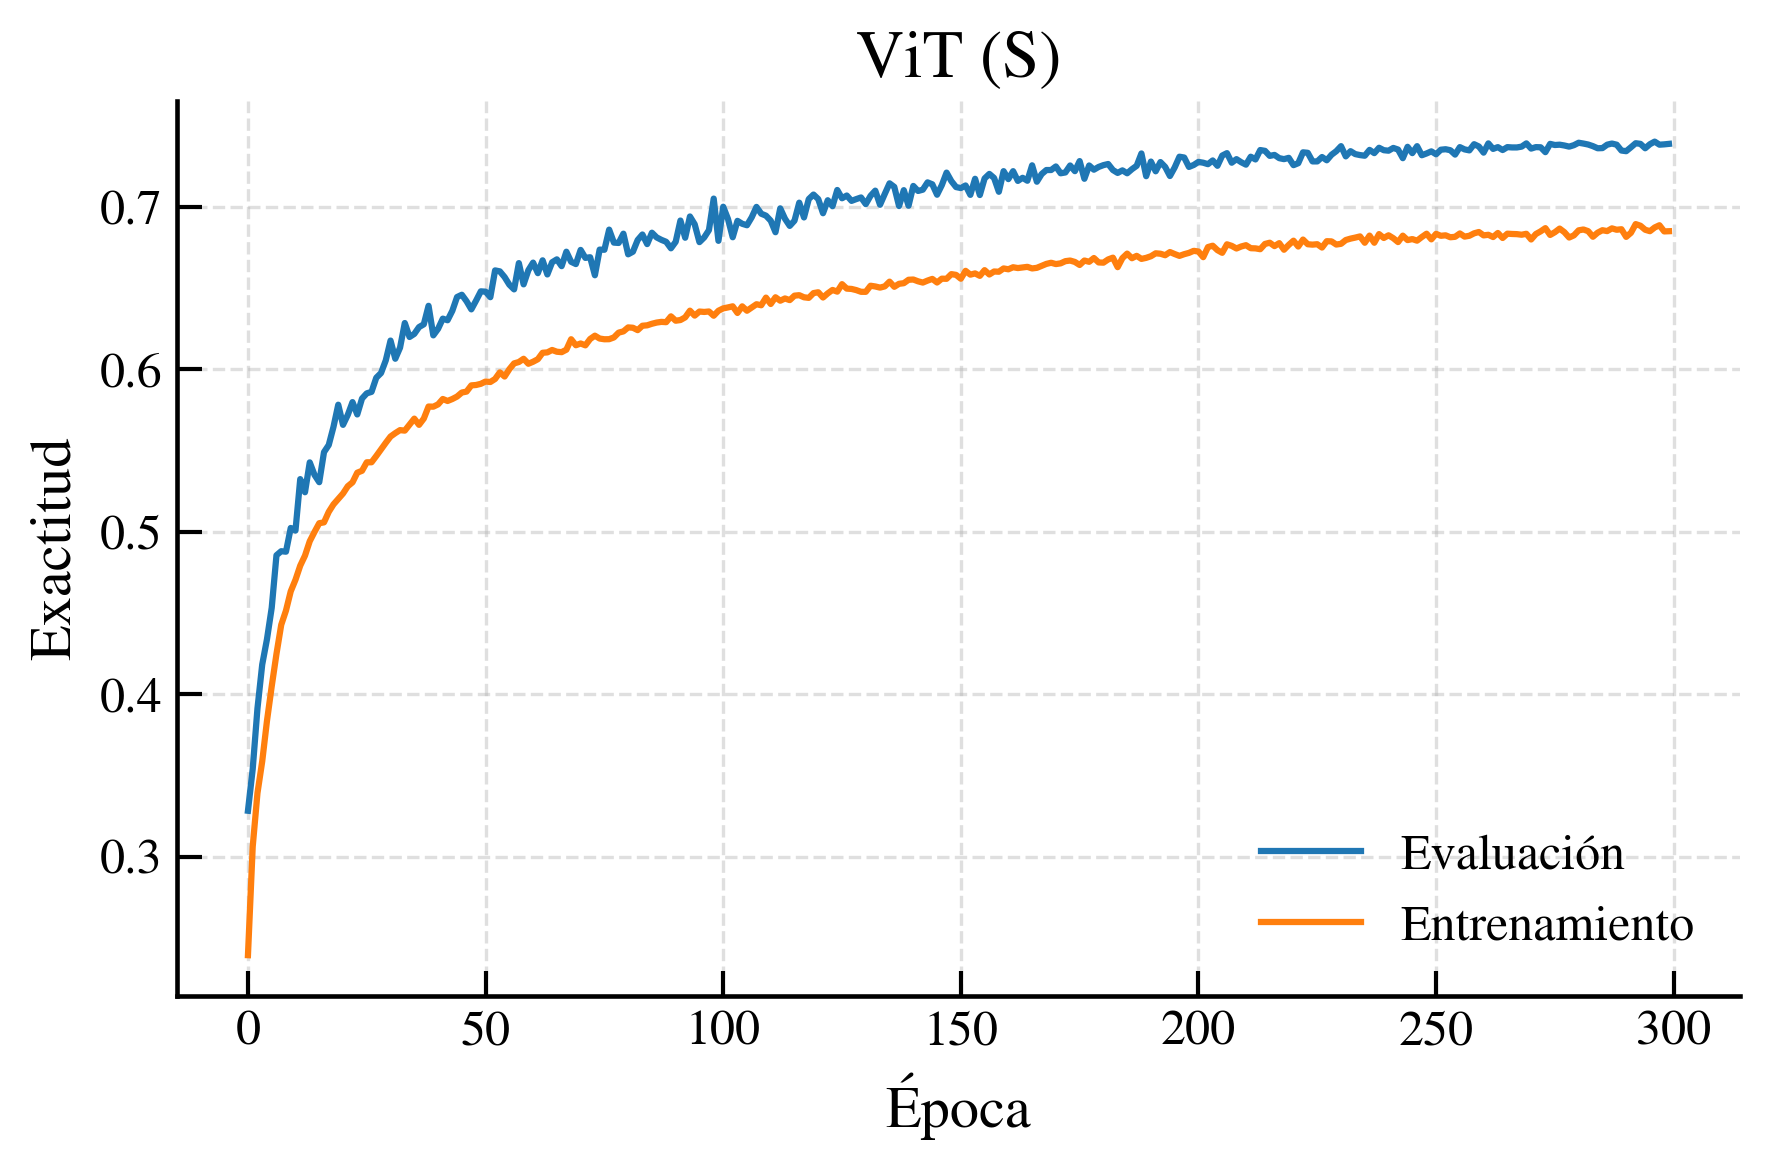

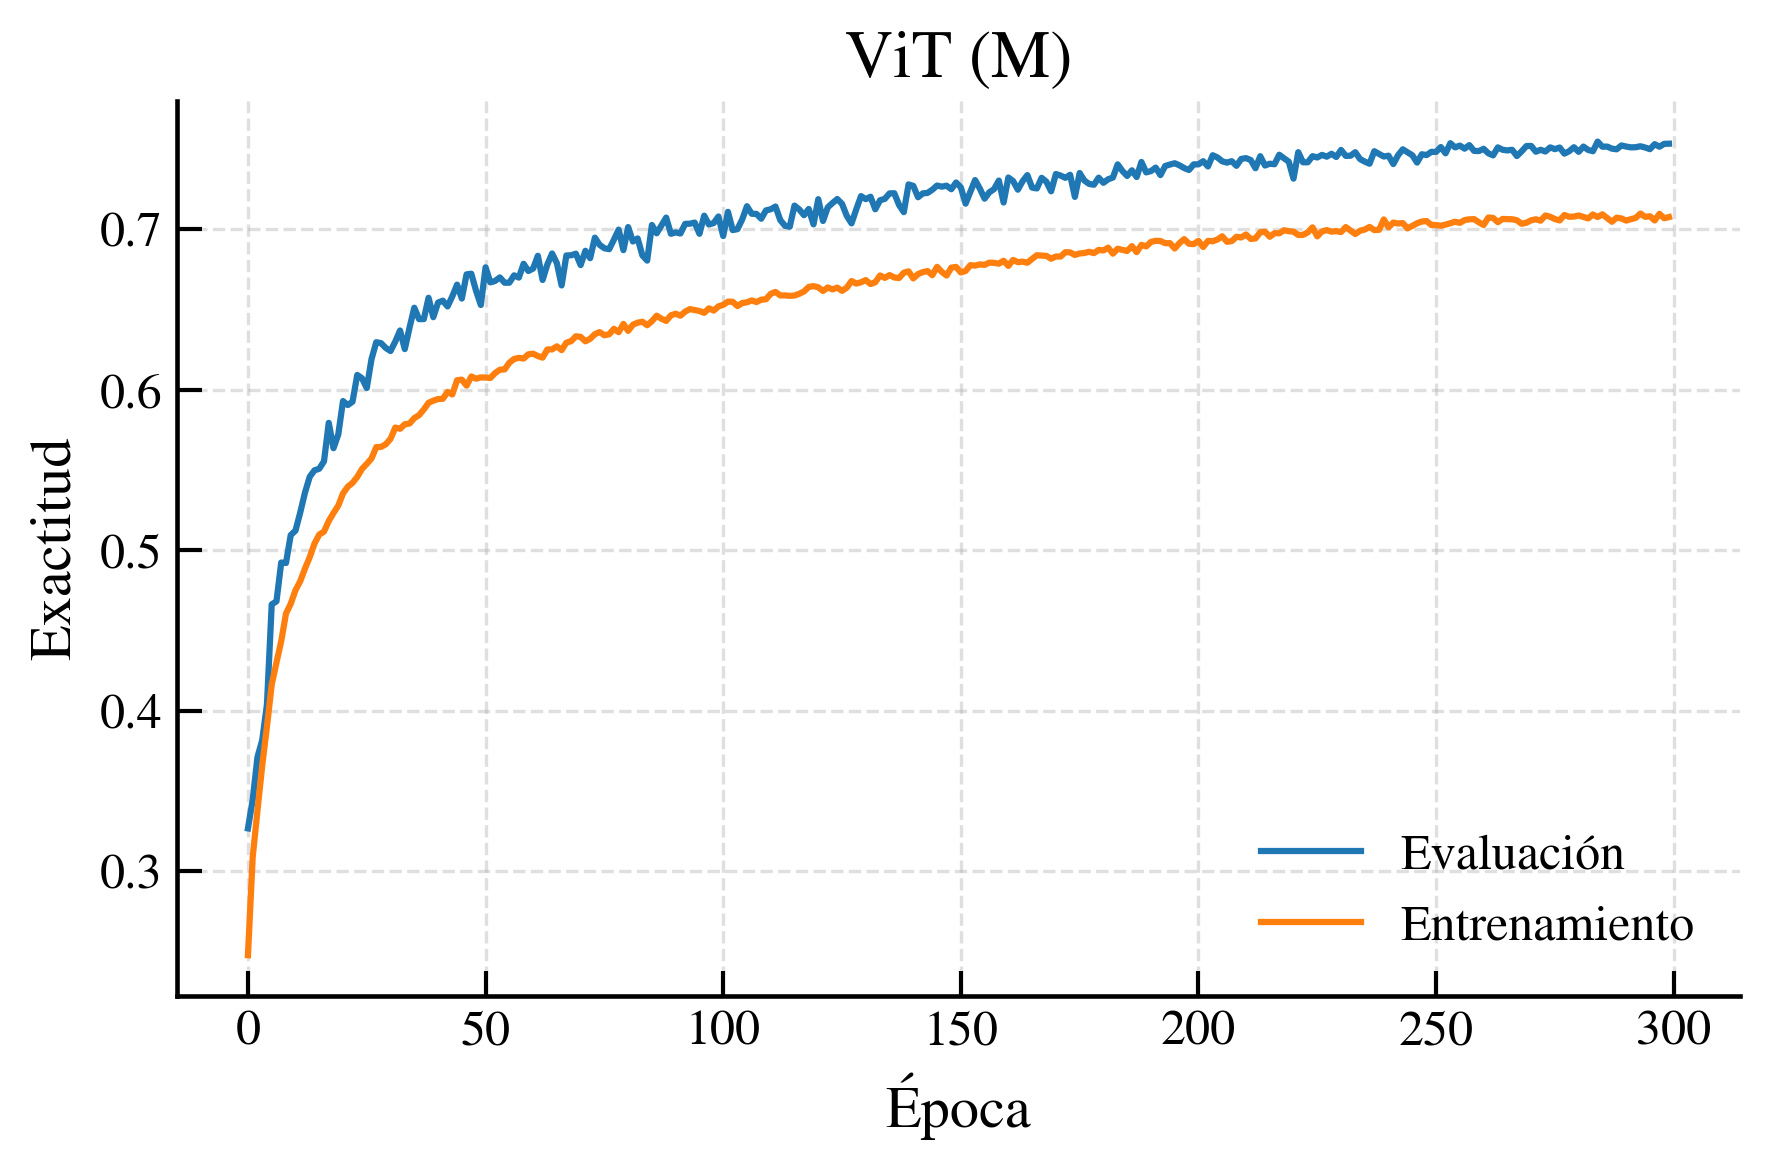

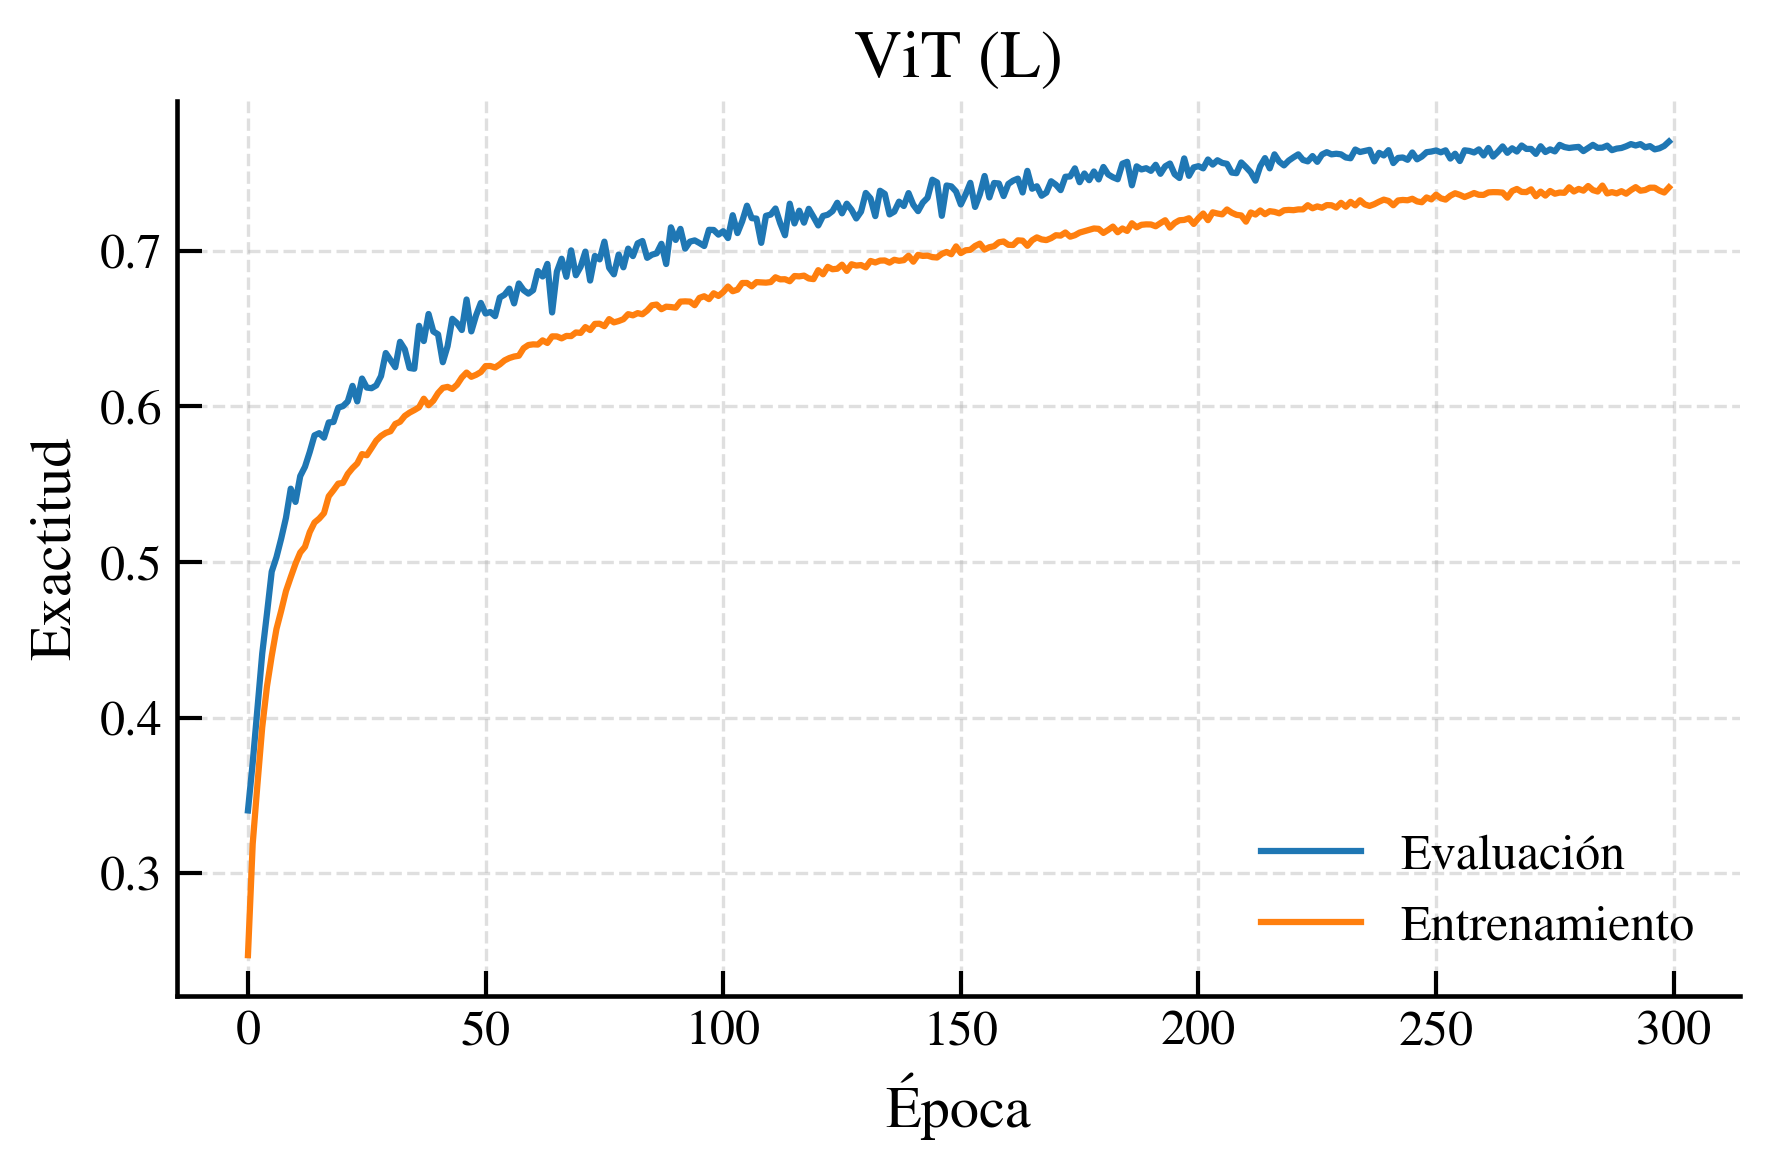

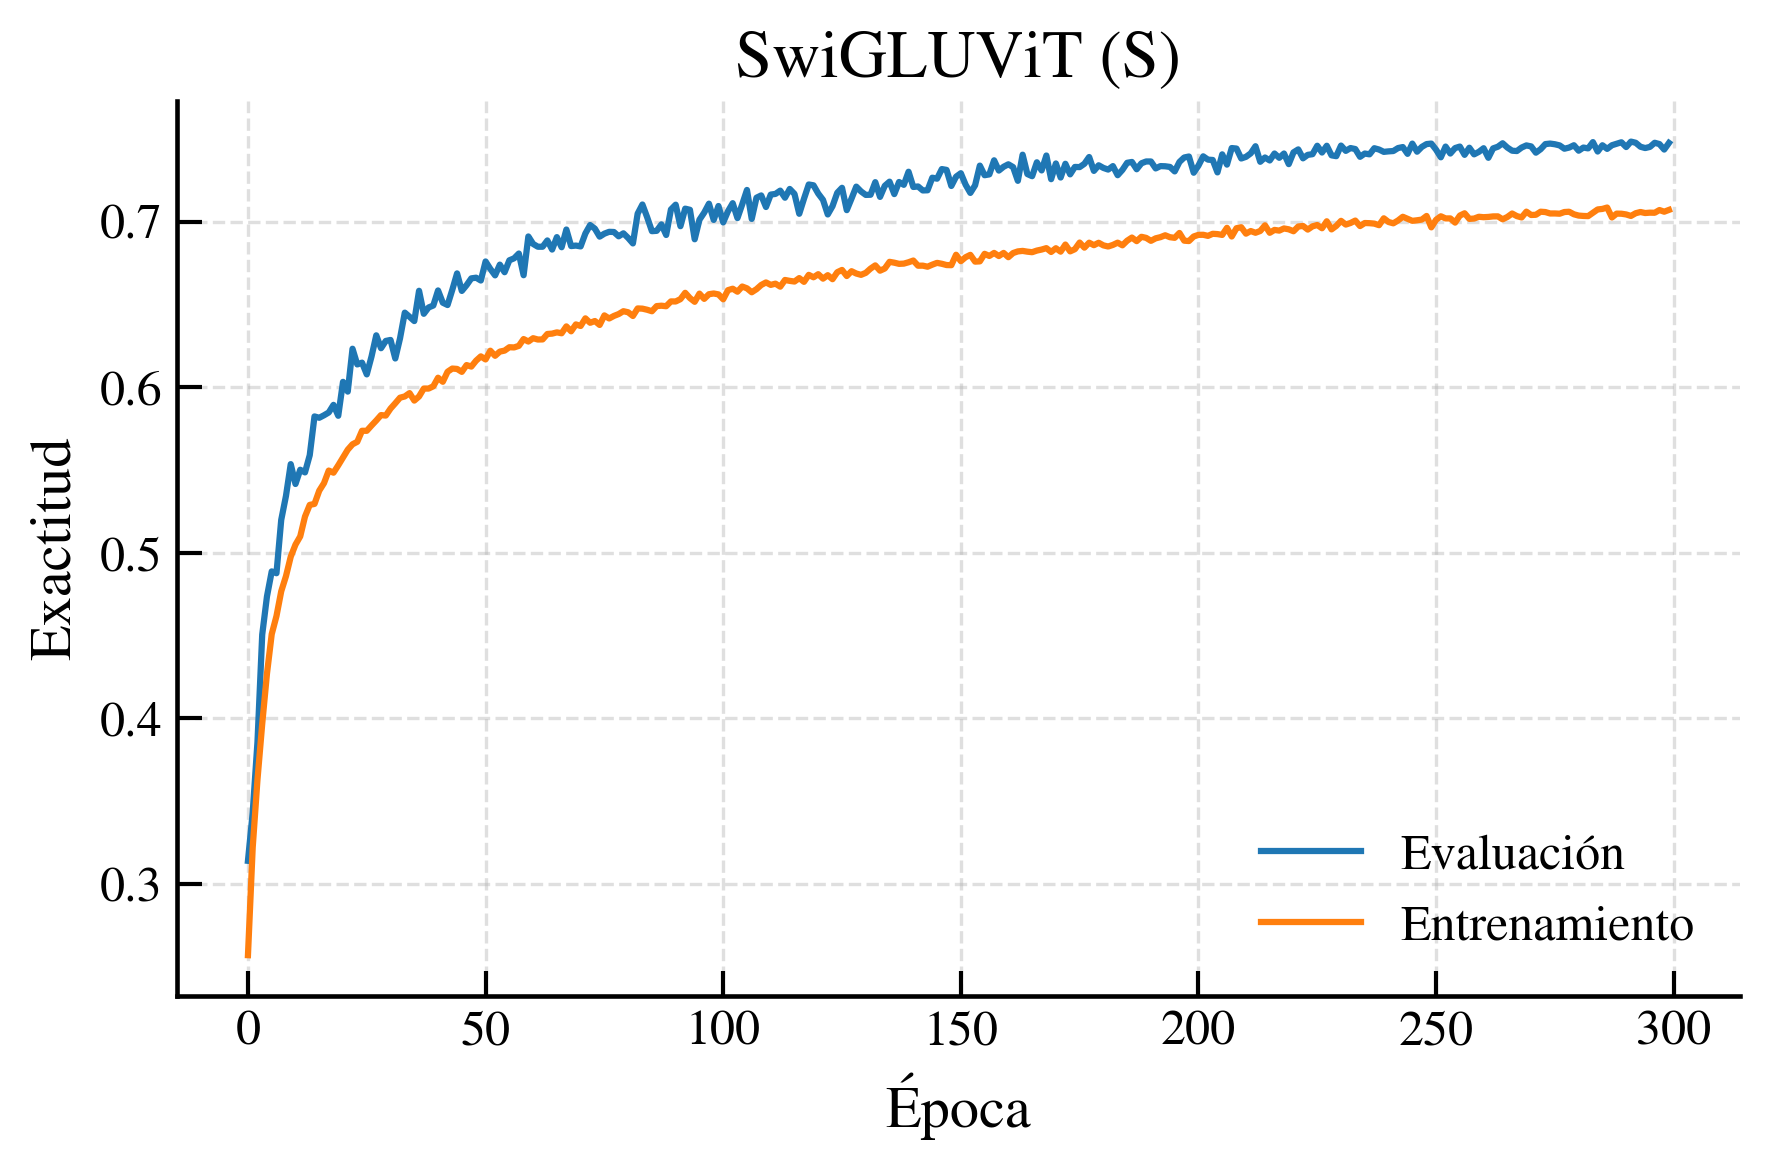

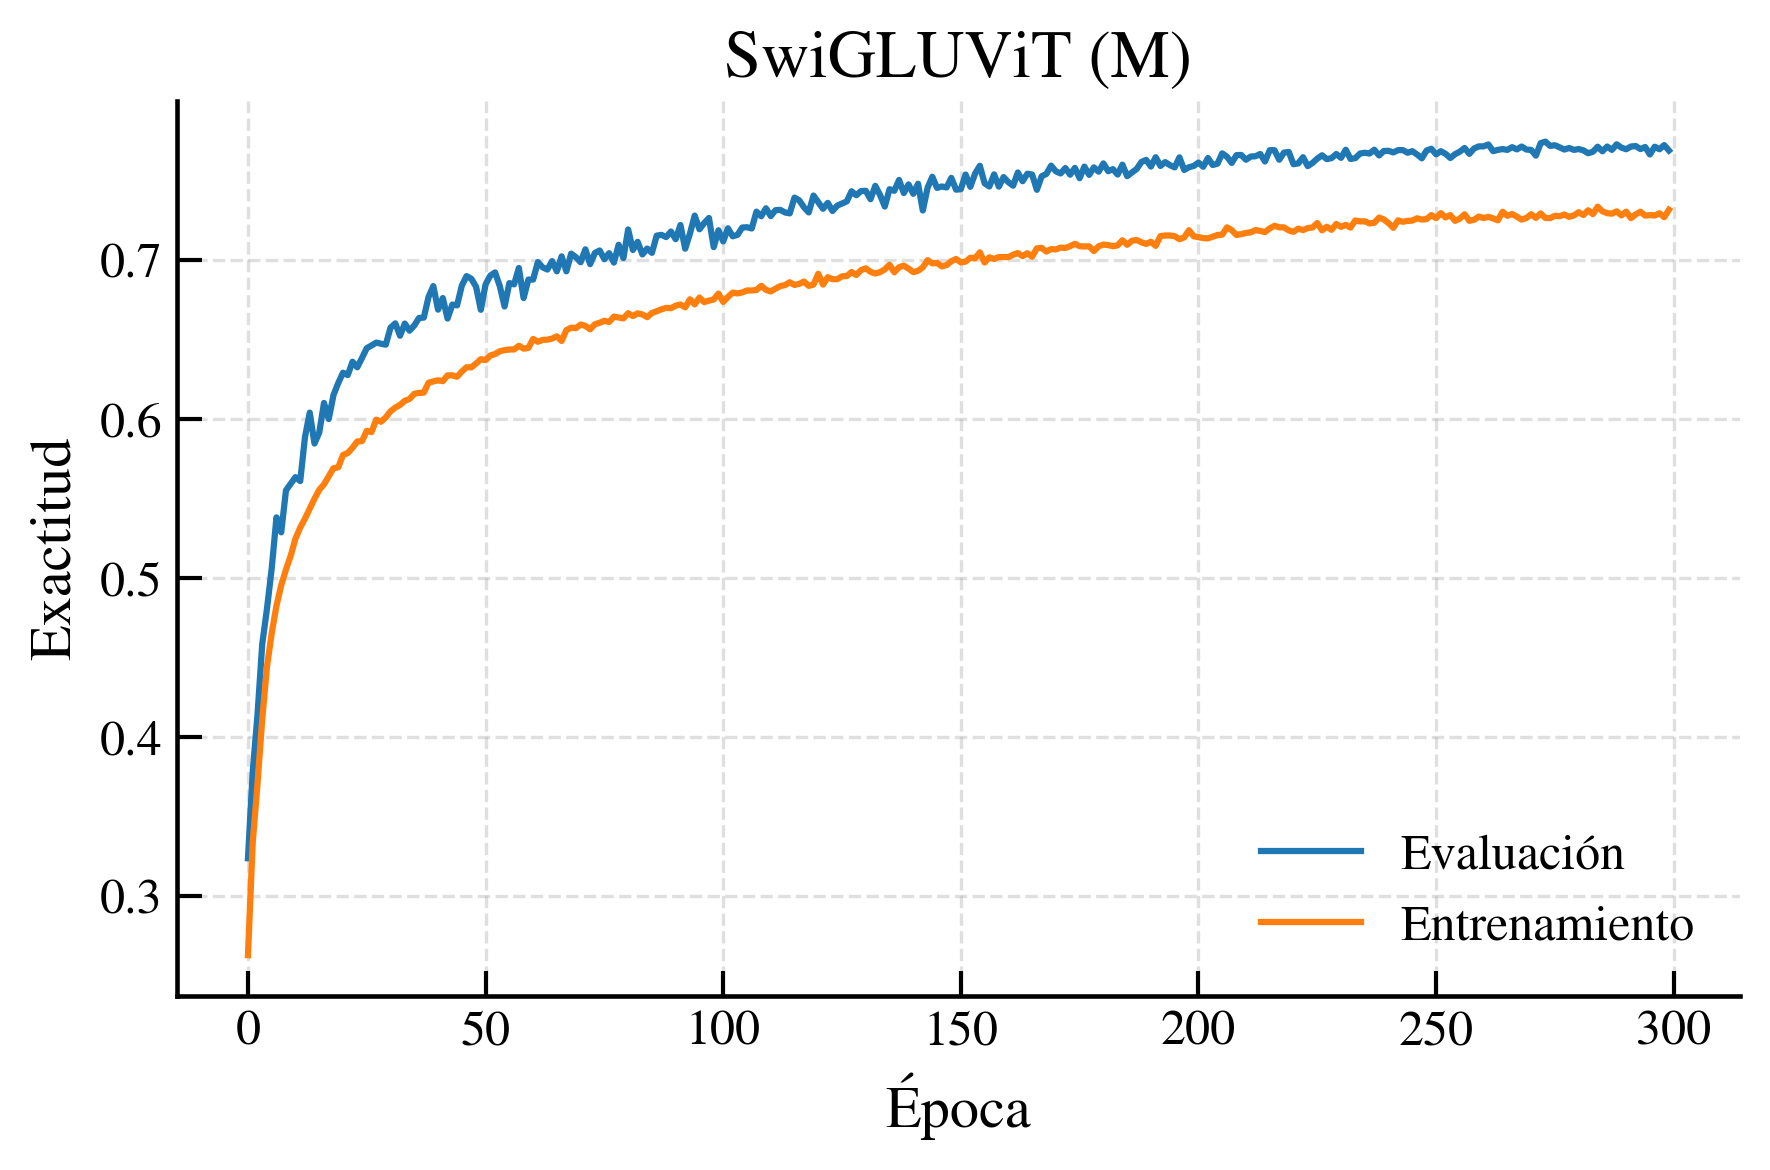

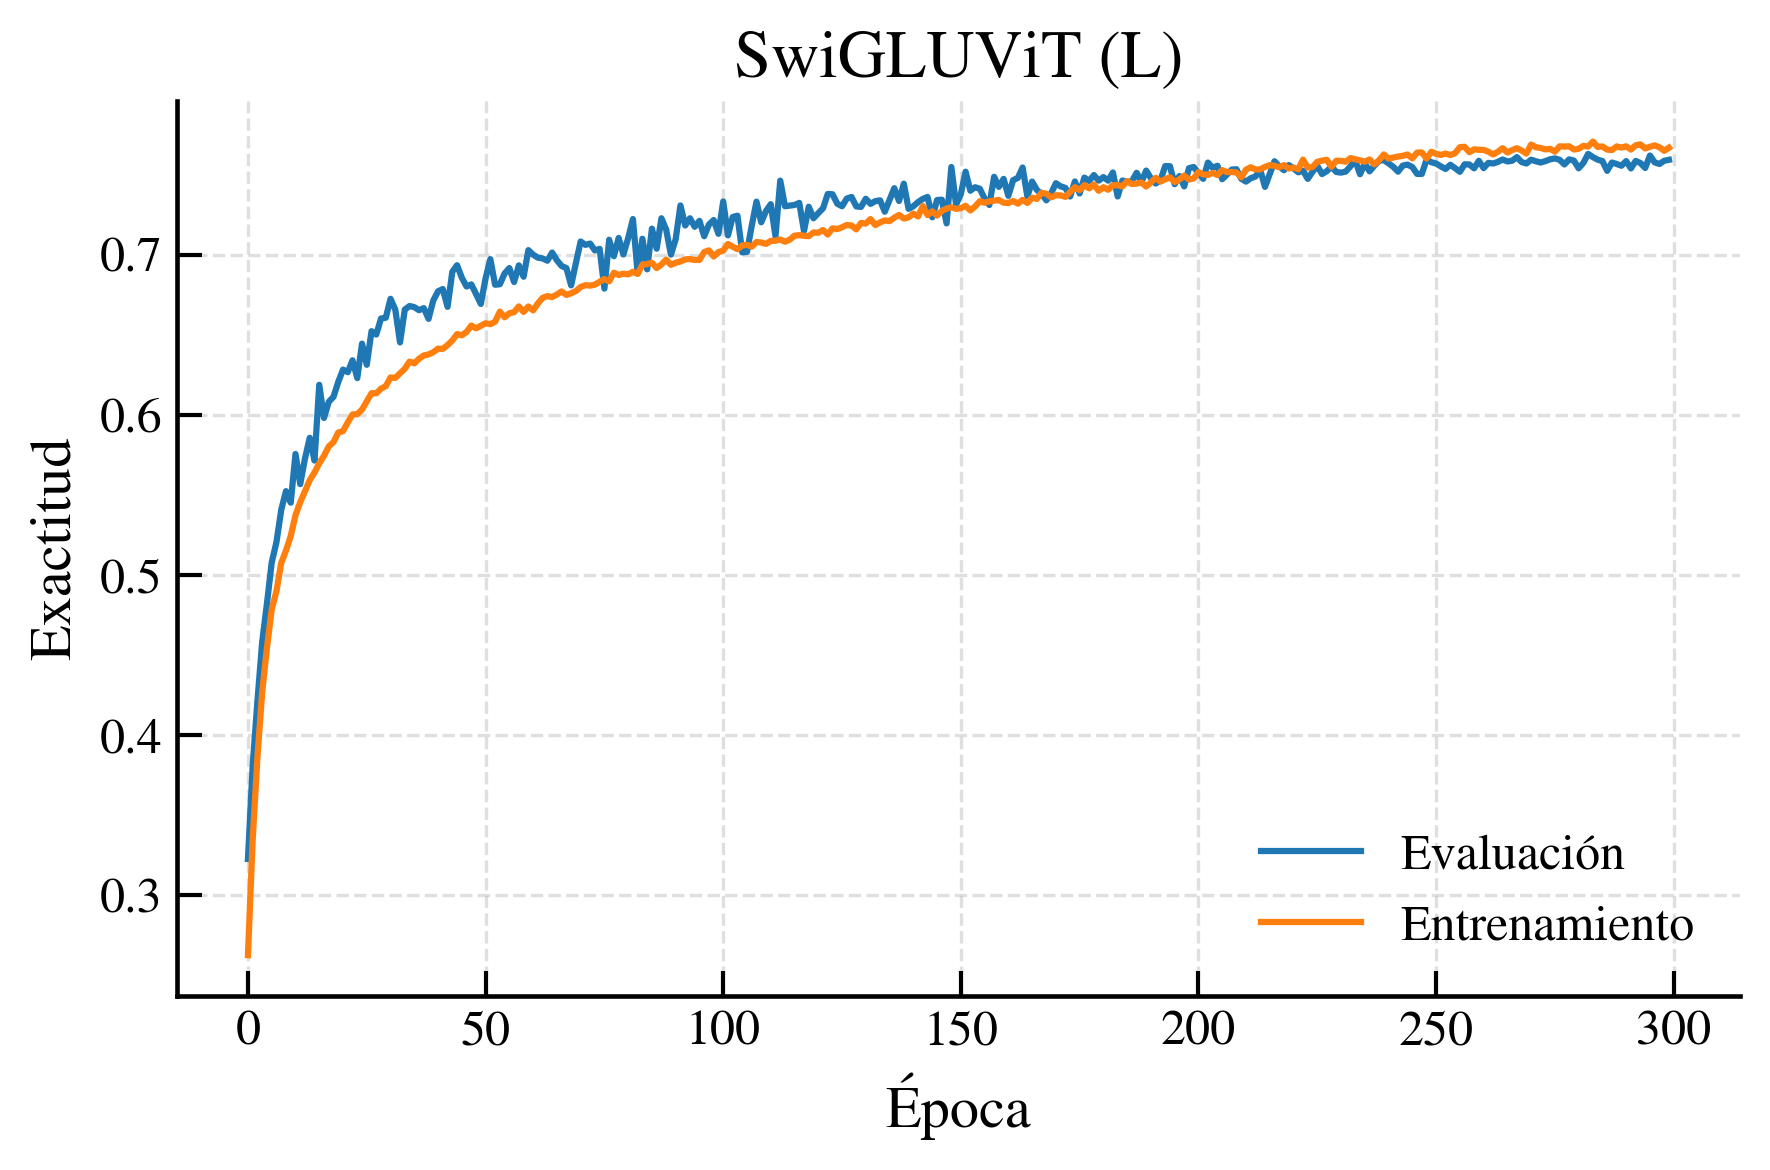

In [26]:
TEXT = {
    'es' : { 
        "xlabel": "Época",
        "ylabel": "Exactitud",
        "label-train"     : "Entrenamiento",
        "label-evaluation": "Evaluación",
    }
}
 
for name in ['ViT', 'SwiGLUViT']:
    for size, path in PATH[name].items():
        dataframe = read_csv(PATH[name][size]) 
        text =  TEXT[LANGUAGE]

        figure, axes = subplots(figsize=(6, 4), dpi=300)
        axes.grid(True, linestyle="--", alpha=0.4)
        axes.tick_params(direction="in", length=6, width=1)
        axes.plot(
            dataframe.loc[dataframe['phase'] == 'evaluation']['epoch'], 
            dataframe.loc[dataframe['phase'] == 'evaluation']['accuracy'], 
            label=text["label-evaluation"]
        )

        axes.plot(
            dataframe['epoch'].loc[dataframe['phase'] == 'train'], 
            dataframe.loc[dataframe['phase'] == 'train']['accuracy'], 
            label=text["label-train"]
        )
        
        axes.set_xlabel(text['xlabel'])
        axes.set_ylabel(text['ylabel'])
        axes.legend(frameon=False) 
        axes.set_title(f"{name} ({size})")
        axes.spines["top"].set_visible(False)
        axes.spines["right"].set_visible(False)

        figure.tight_layout()
        show(figure)
        close(figure)

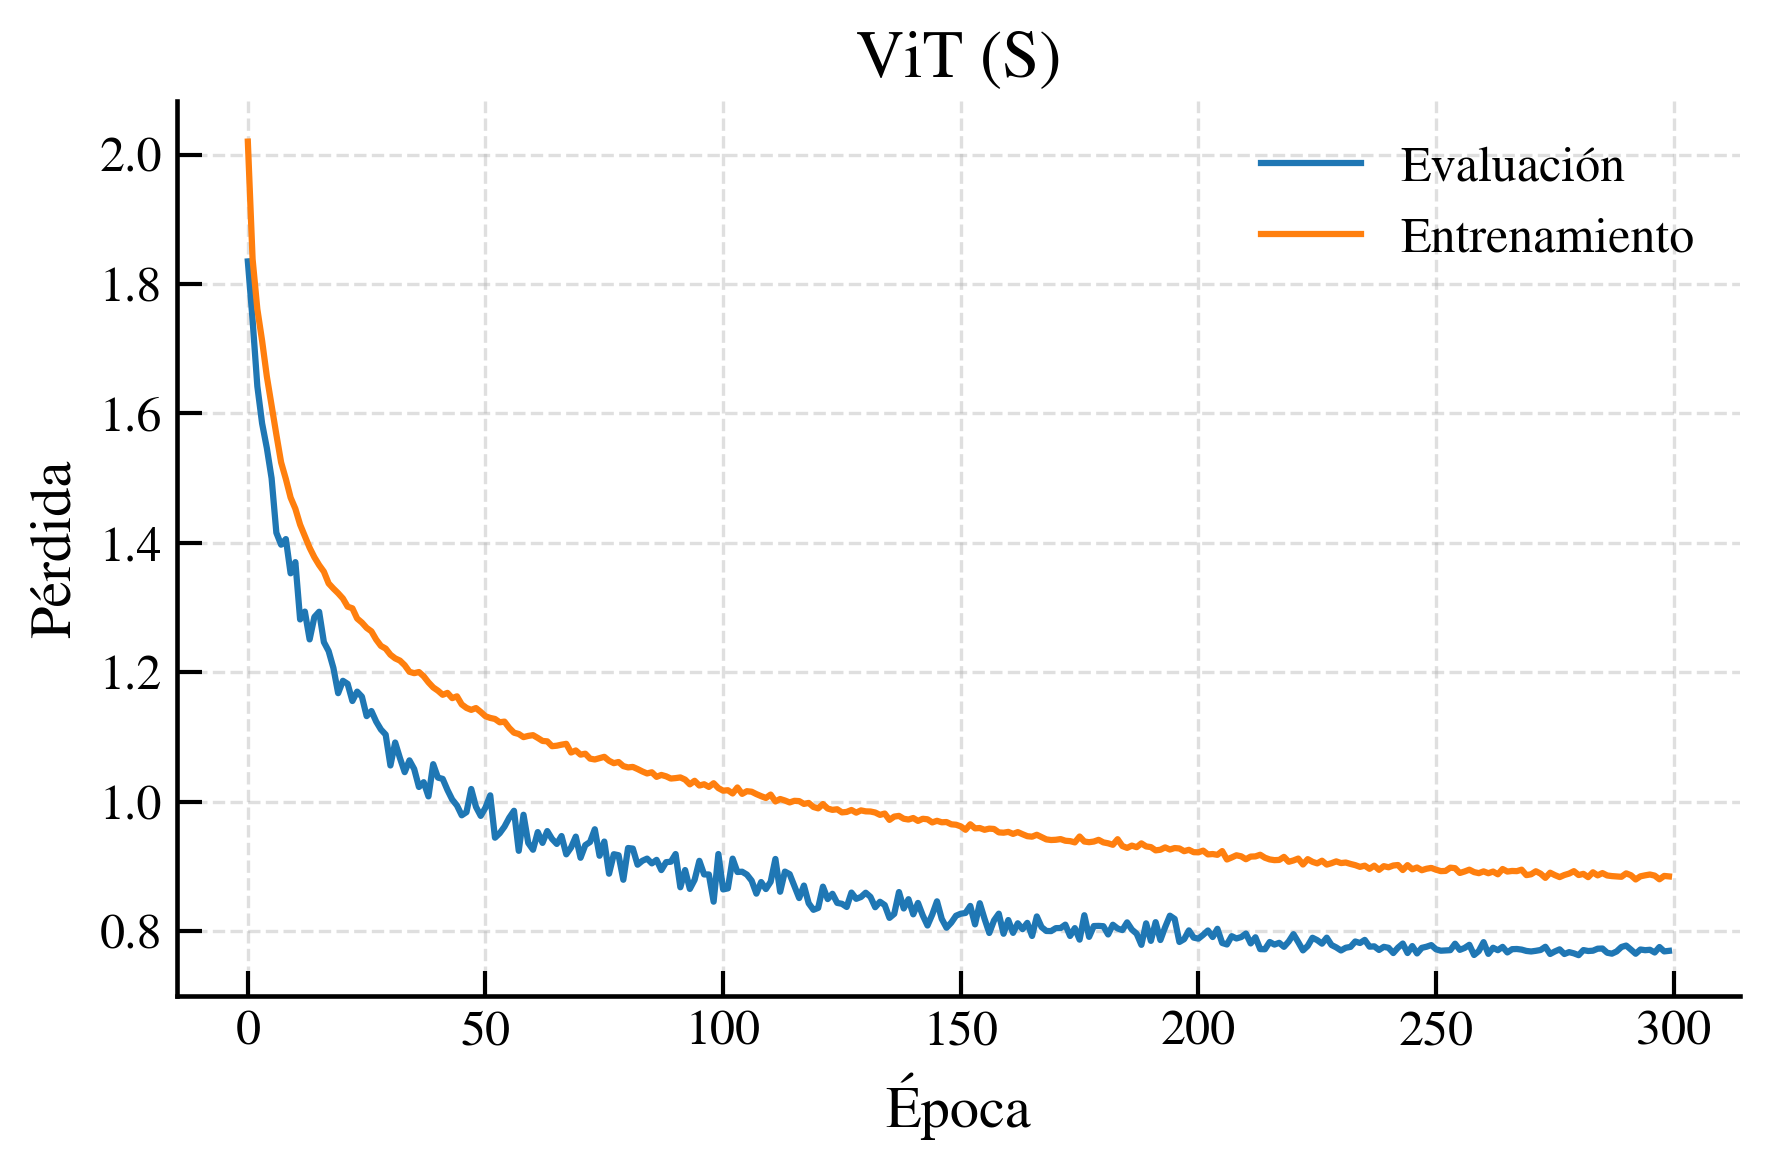

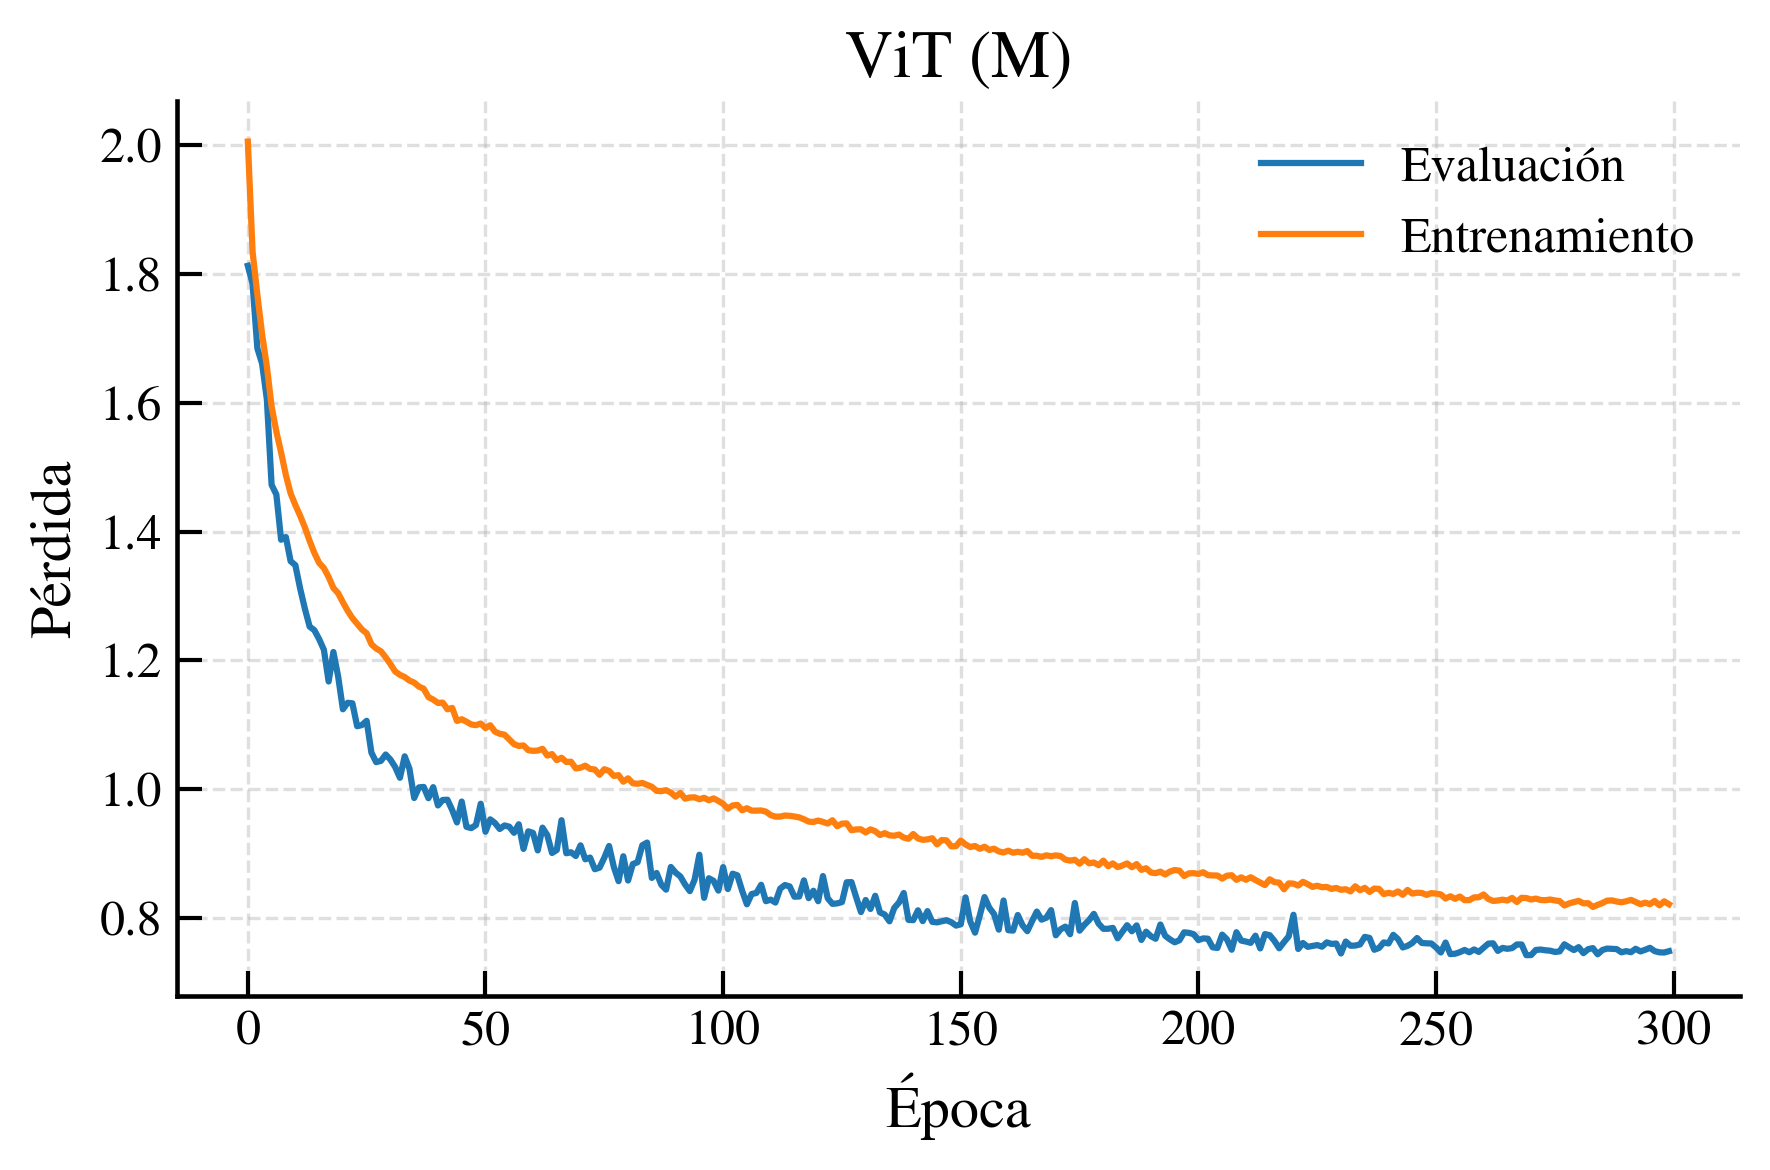

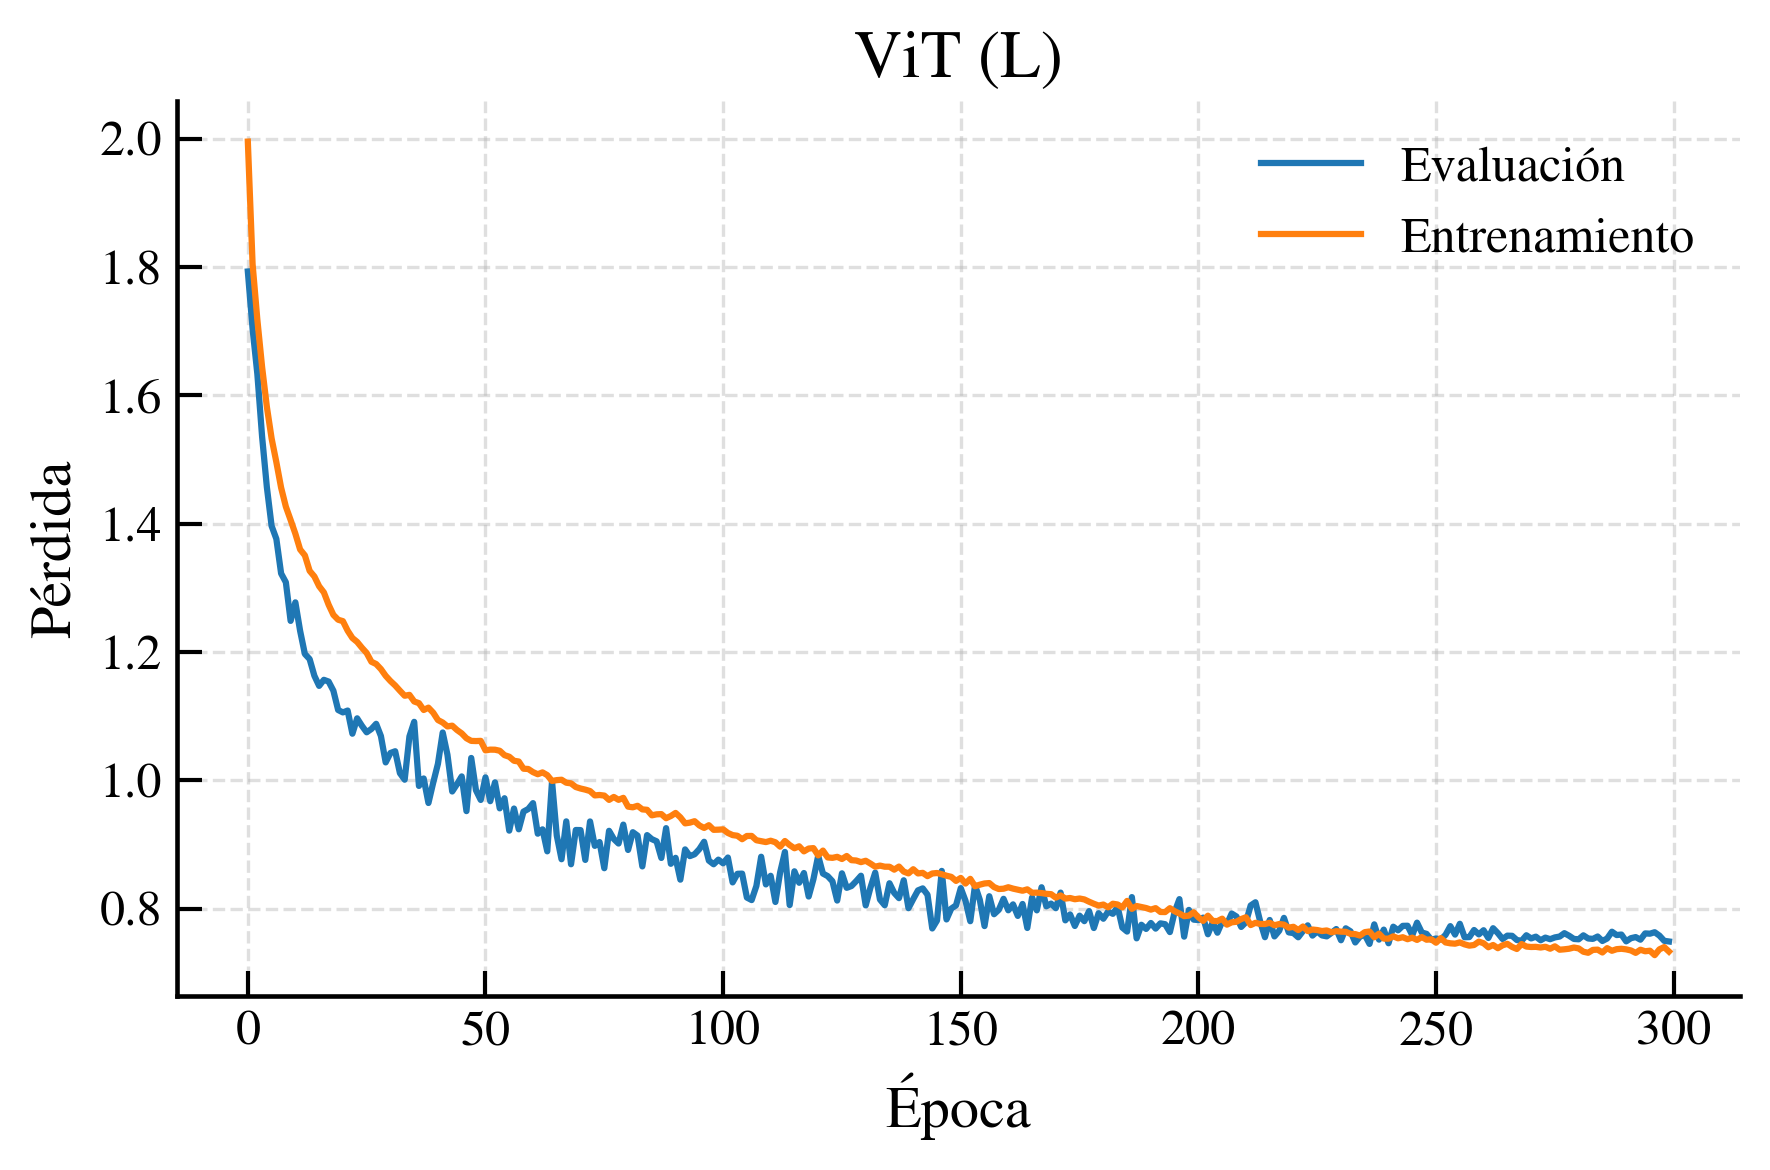

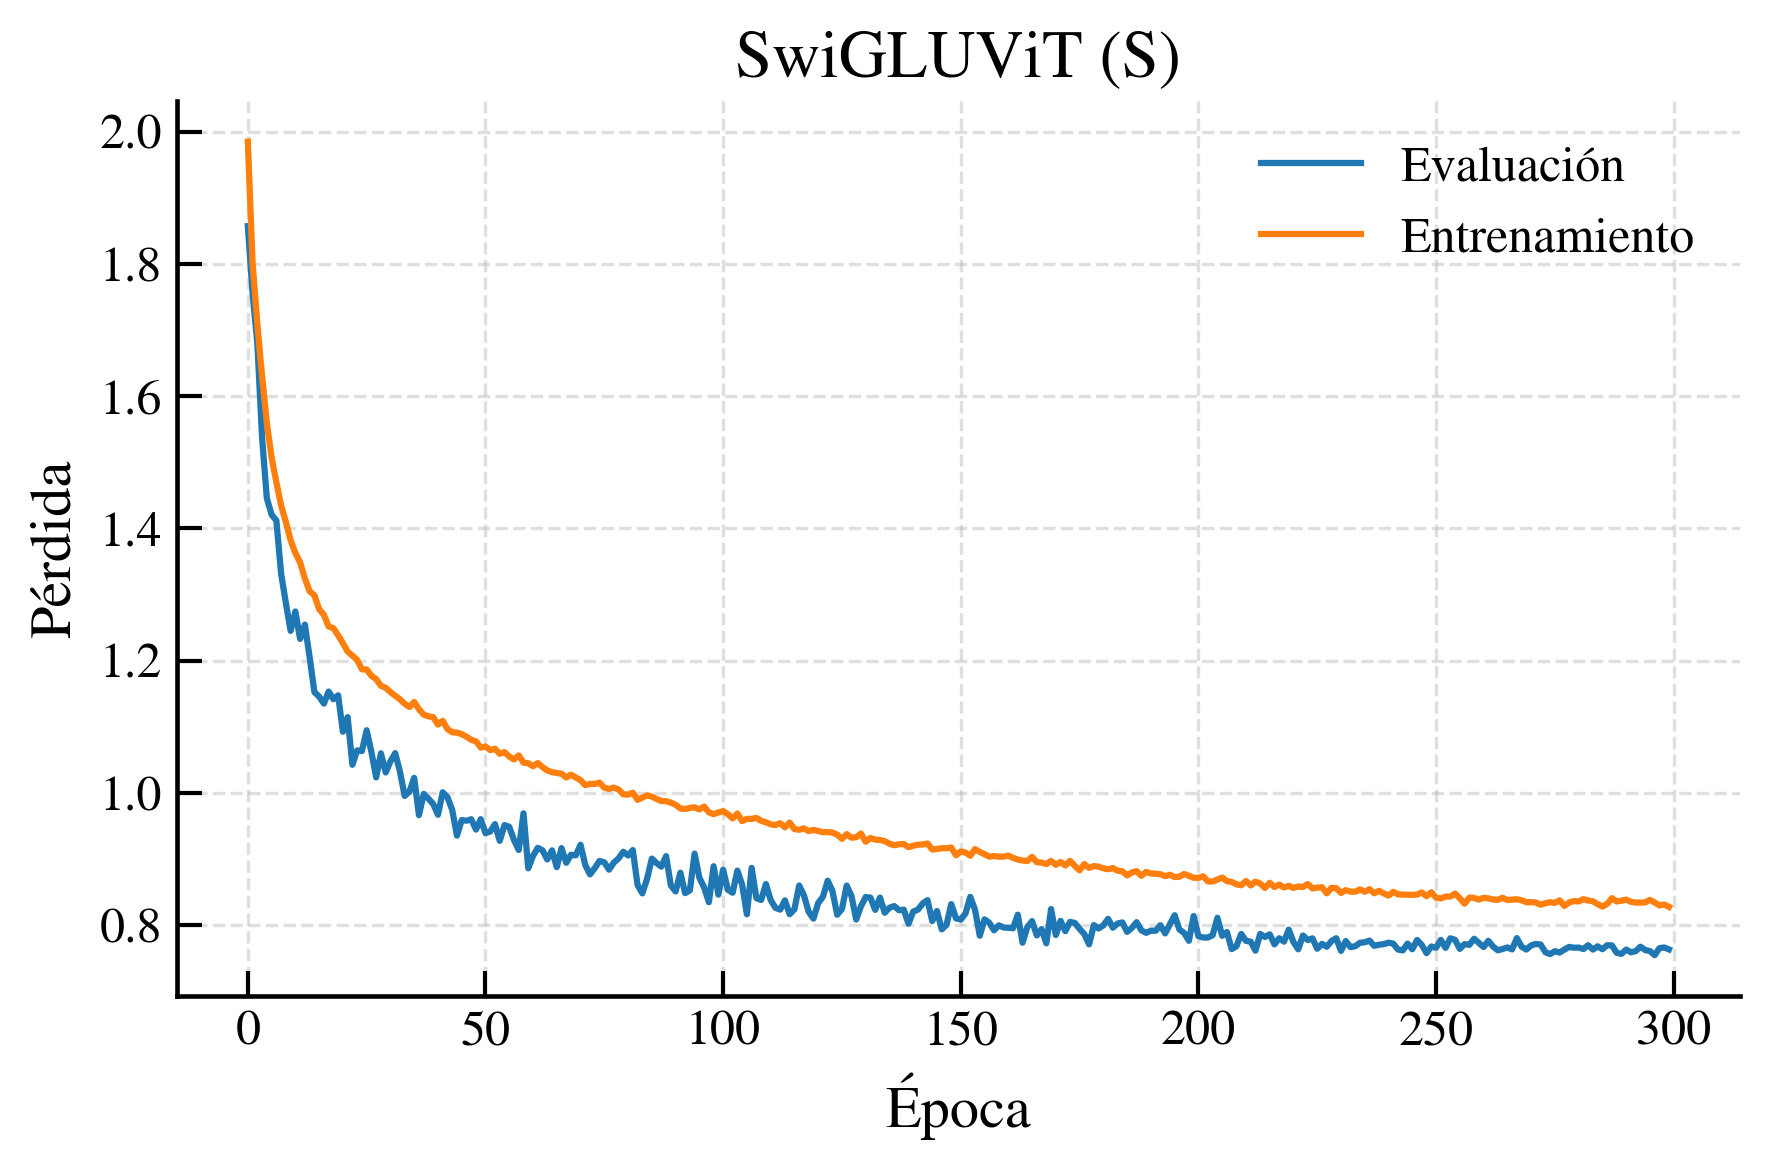

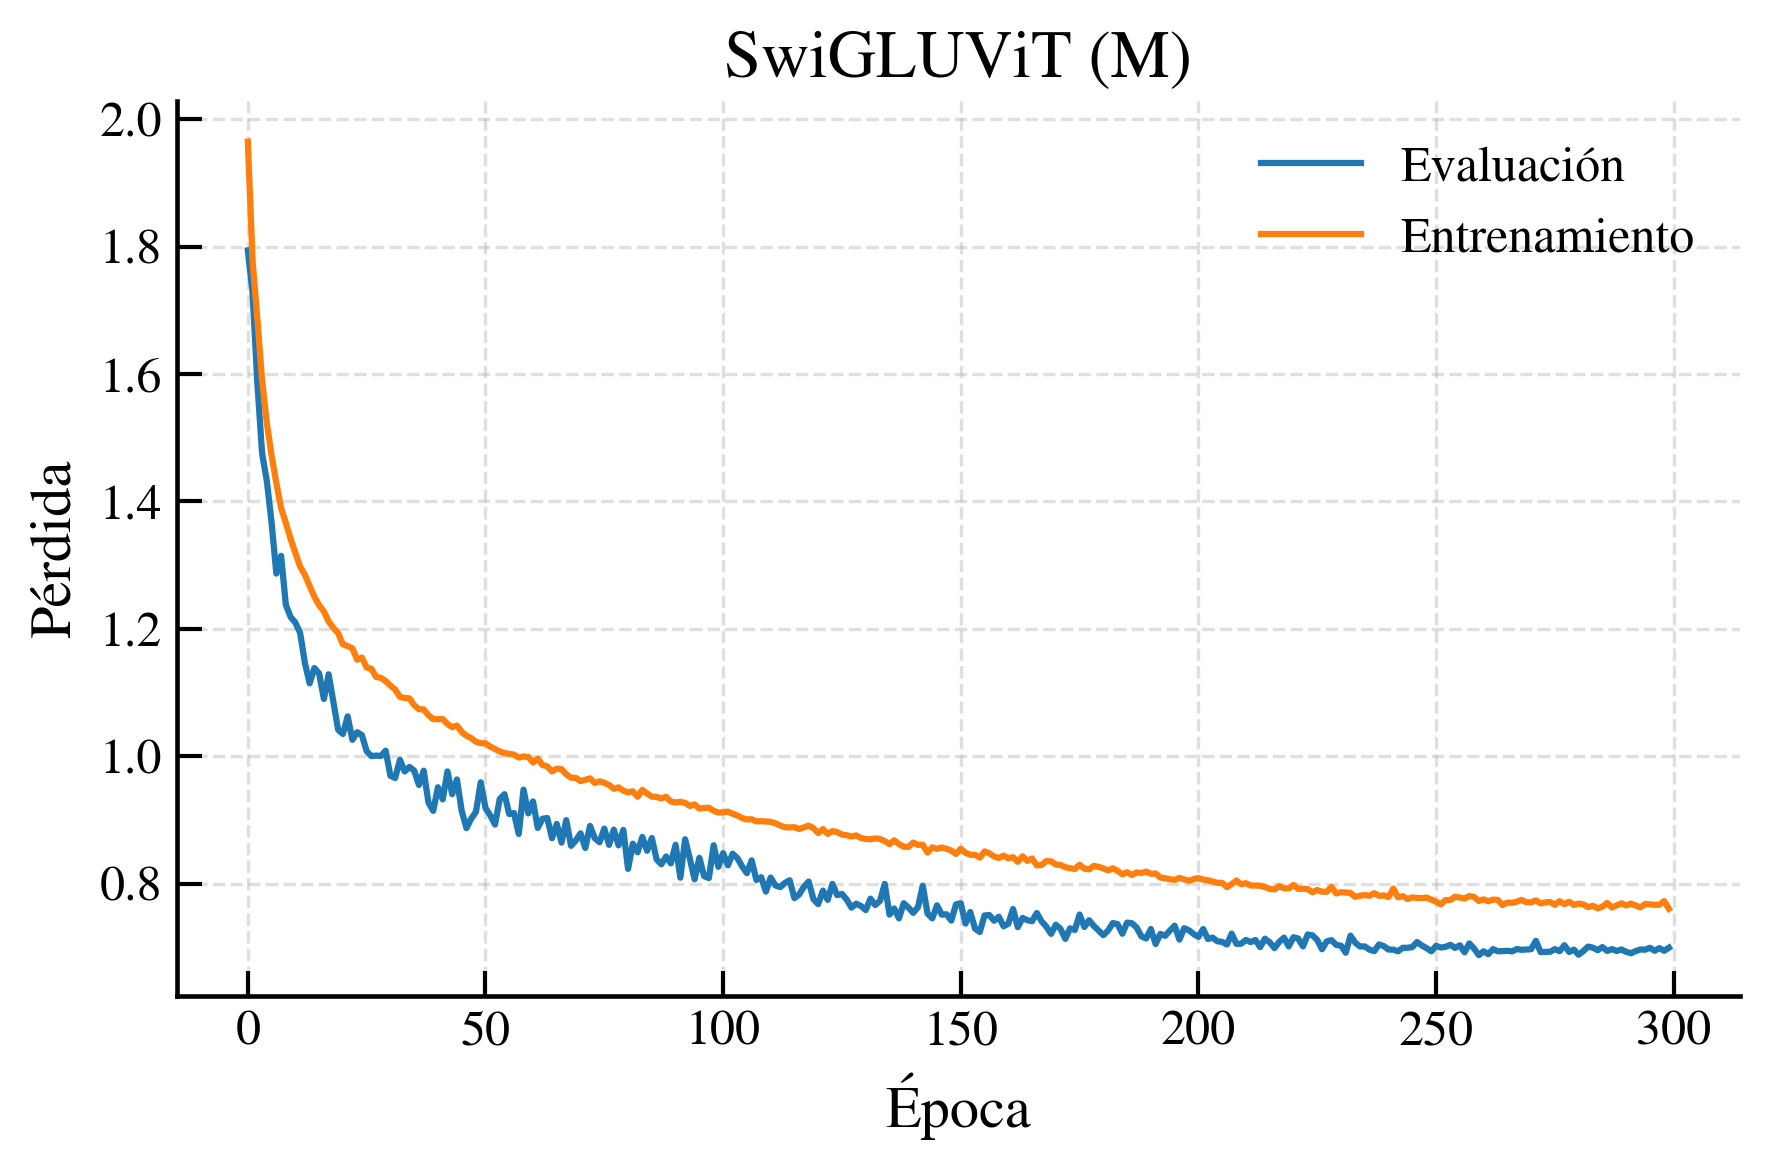

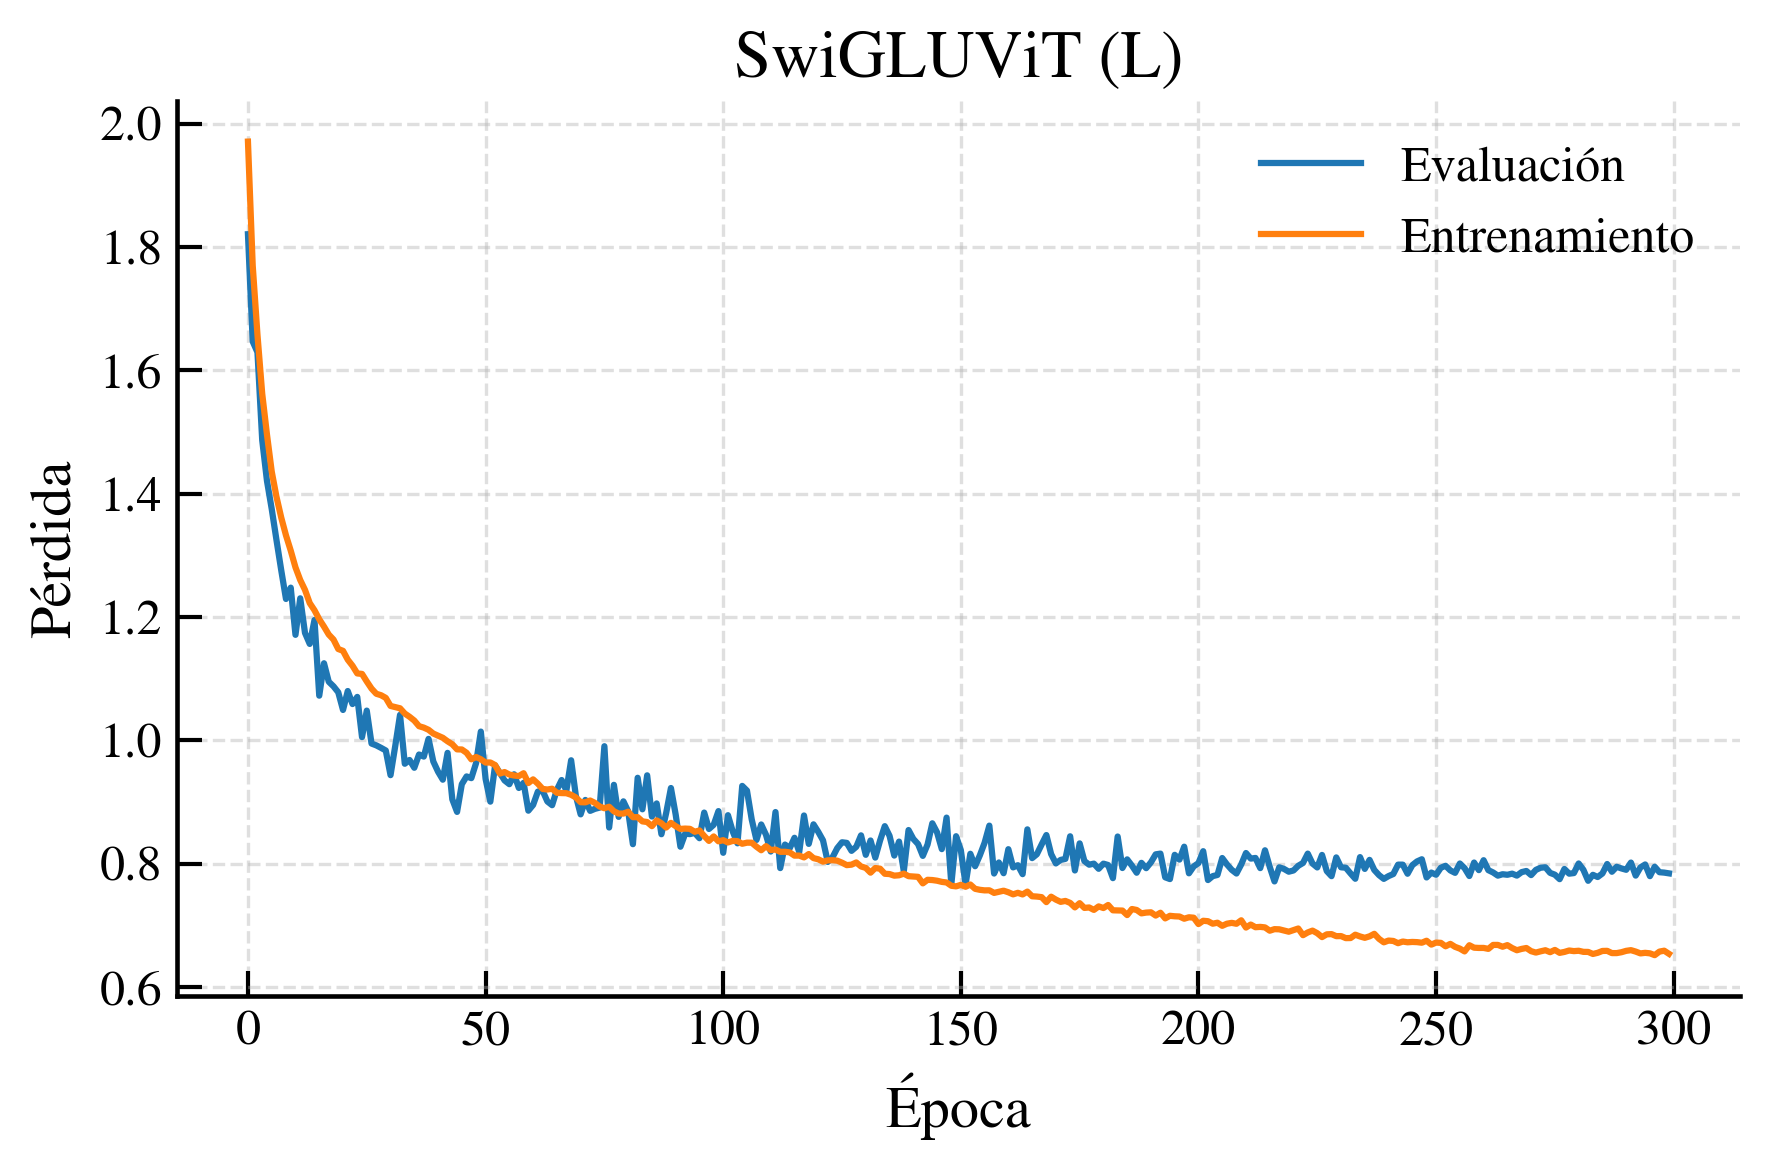

In [27]:
TEXT = {
    'es' : { 
        "xlabel": "Época",
        "ylabel": "Pérdida",
        "label-train"     : "Entrenamiento",
        "label-evaluation": "Evaluación",
    }
}

for name in ['ViT', 'SwiGLUViT']:
    for size, path in PATH[name].items():
        dataframe = read_csv(PATH[name][size]) 
        text =  TEXT['es']

        figure, axes = subplots(figsize=(6, 4), dpi=300)
        axes.grid(True, linestyle="--", alpha=0.4)
        axes.tick_params(direction="in", length=6, width=1)
        axes.plot(
            dataframe.loc[dataframe['phase'] == 'evaluation']['epoch'], 
            dataframe.loc[dataframe['phase'] == 'evaluation']['loss'], 
            label=text["label-evaluation"]
        )

        axes.plot(
            dataframe['epoch'].loc[dataframe['phase'] == 'train'], 
            dataframe.loc[dataframe['phase'] == 'train']['loss'], 
            label=text["label-train"]
        )
        
        axes.set_xlabel(text['xlabel'])
        axes.set_ylabel(text['ylabel'])
        axes.legend(frameon=False) 
        axes.set_title(f"{name} ({size})")
        axes.spines["top"].set_visible(False)
        axes.spines["right"].set_visible(False)

        figure.tight_layout()
        show(figure)
        close(figure)

In [28]:
TEXT = {
    'es': {
        'size' : 'Tamaño',
        'mean' : 'Promedio',
        'max'  : 'Máxima',
        'epoch': 'Época',
        'title': 'Exactitud',
    }, 
}

for name in ['ViT', 'SwiGLUViT']:
    text = TEXT[LANGUAGE]
    rows = []
    for size in ['S', 'M', 'L']:
        dataframe = read_csv(PATH[name][size]) 
        dataframe = dataframe.loc[dataframe['phase'] == 'evaluation'].tail(WINDOW)
        rows.append({
            text['size'] : size,
            text['mean'] : dataframe['accuracy'].mean(),
            text['max']  : dataframe['accuracy'].max(),
            text['epoch'] : dataframe.loc[dataframe['accuracy'].idxmax(), 'epoch']
        })

    results = DataFrame(rows).set_index(text['size'])
    display(Markdown(f"### {text['title']} {name}"))
    display(results)

### Exactitud ViT

,Promedio,Máxima,Época
Tamaño,,,
S,0.737820,0.7402,296
M,0.751420,0.7548,284
L,0.766815,0.7702,299


### Exactitud SwiGLUViT

,Promedio,Máxima,Época
Tamaño,,,
S,0.745800,0.7484,291
M,0.769815,0.7726,288
L,0.757525,0.7629,282


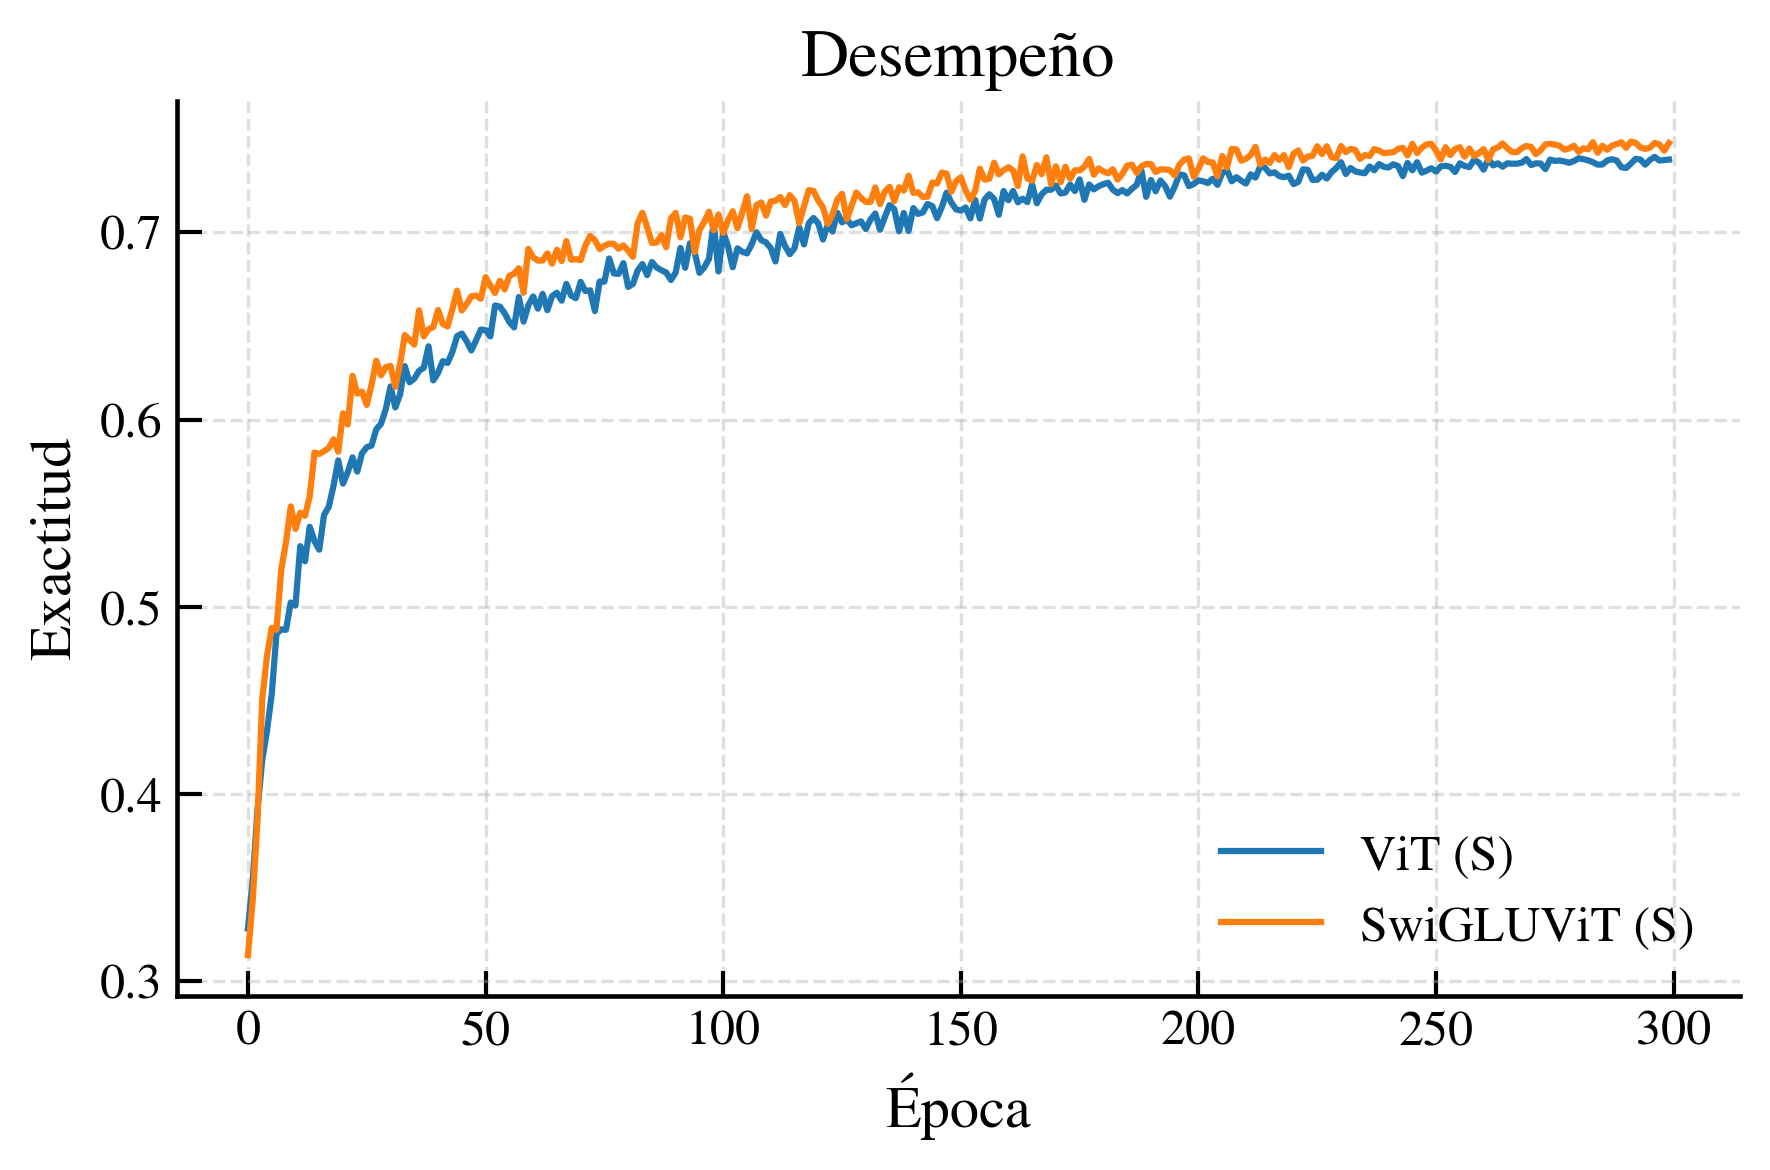

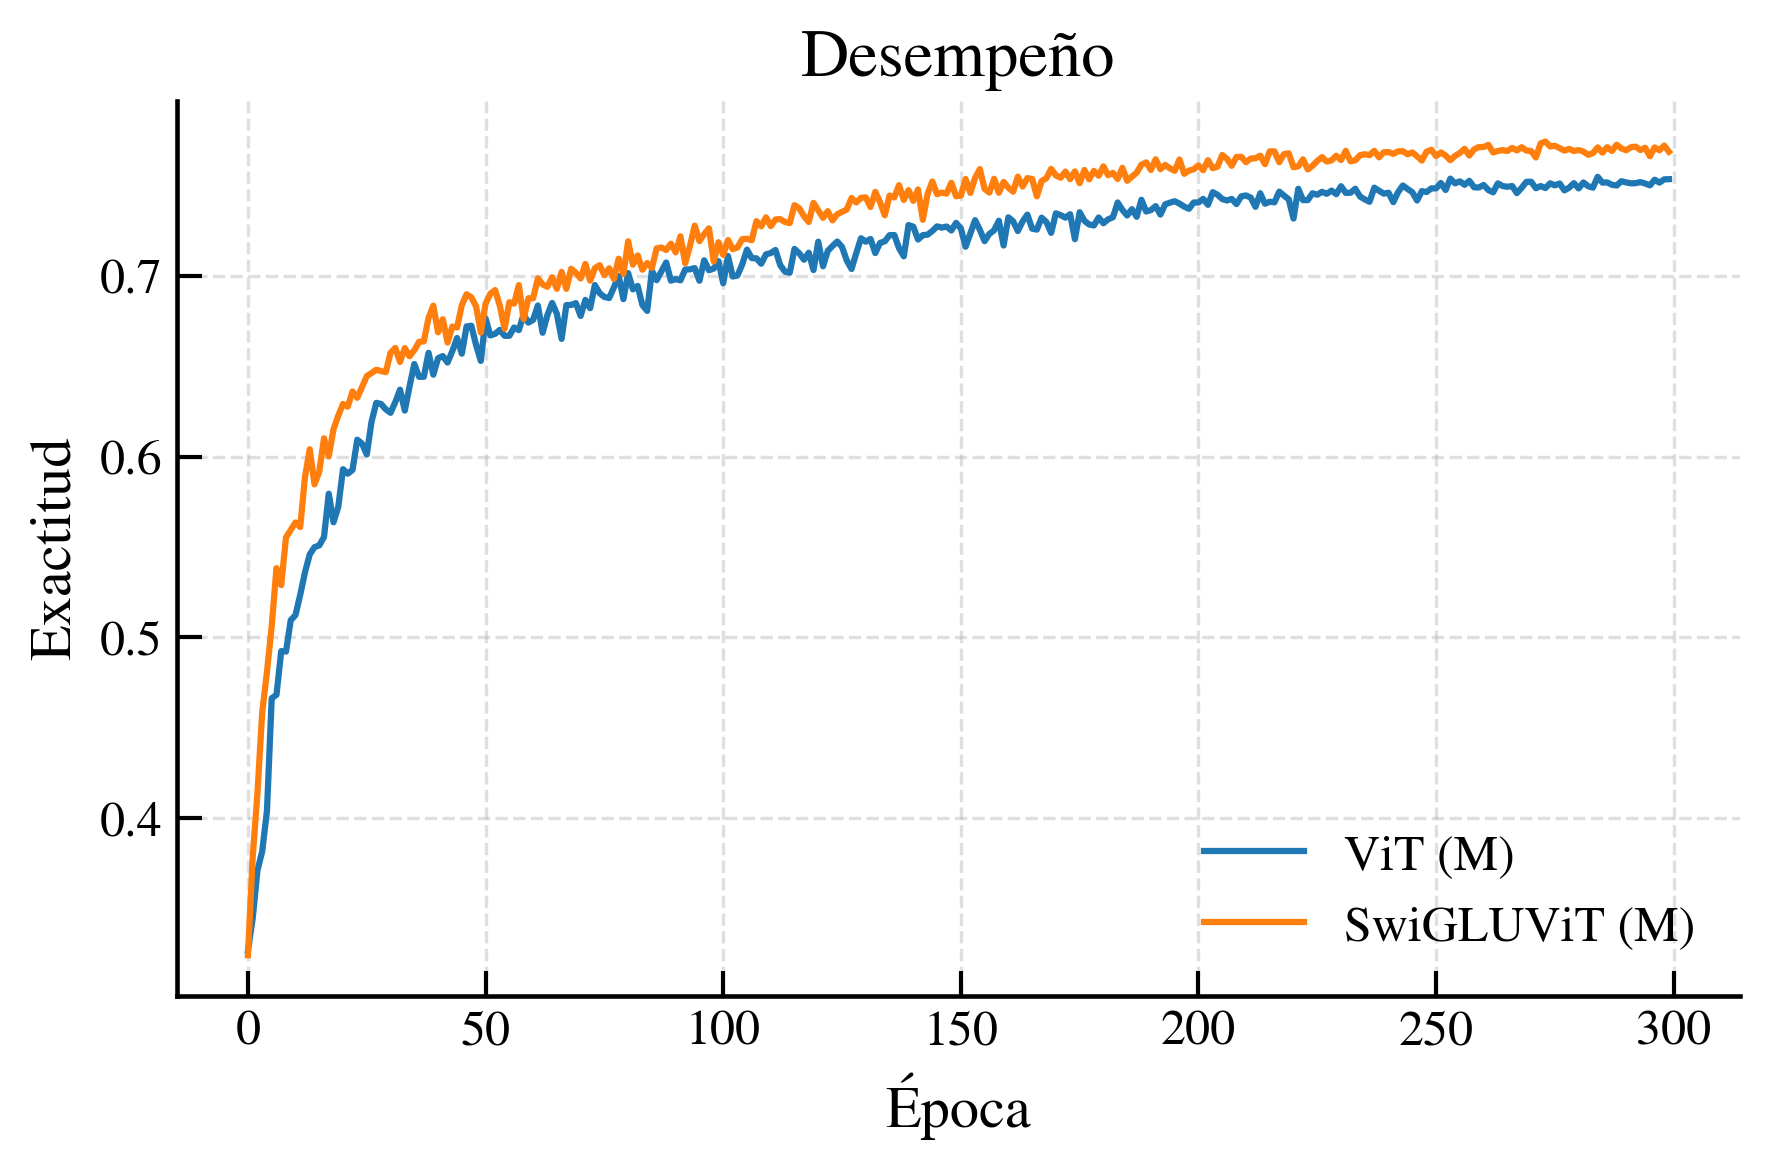

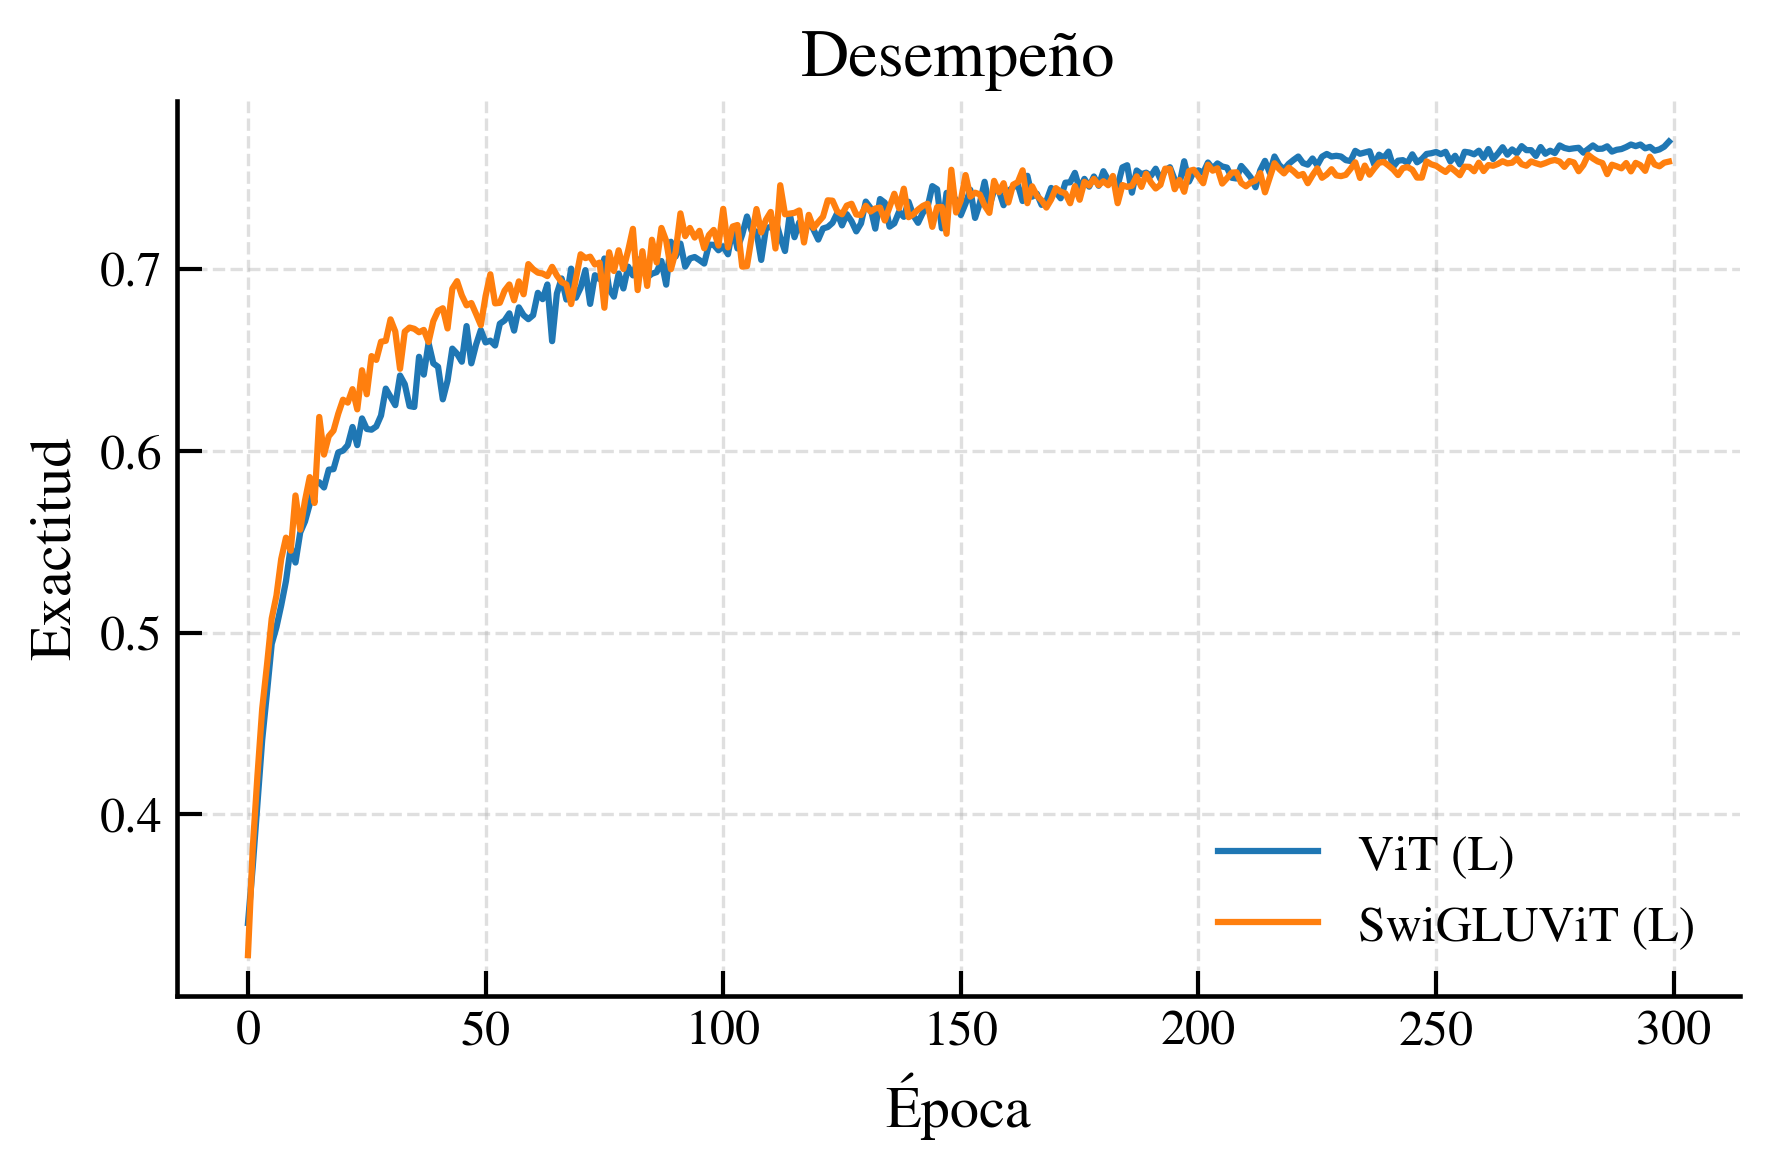

In [29]:
TEXT = {
    'es' : { 
        "xlabel": "Época",
        "ylabel": "Exactitud",
        "ViT"      : "ViT",
        "SwiGLUViT": "SwiGLUViT",
        'title' : "Desempeño"
    }
}

for size in ['S', 'M', 'L']:
    text = TEXT[LANGUAGE]
    dataframe = {
        'ViT': read_csv(PATH['ViT'][size]),
        'SwiGLUViT': read_csv(PATH['SwiGLUViT'][size])
    }


    figure, axes = subplots(figsize=(6, 4), dpi=300)
    axes.grid(True, linestyle="--", alpha=0.4)
    axes.tick_params(direction="in", length=6, width=1) 

    axes.plot(
        dataframe['ViT'].loc[dataframe['ViT']['phase'] == 'evaluation']['epoch'],
        dataframe['ViT'].loc[dataframe['ViT']['phase'] == 'evaluation']['accuracy'],
        label=f"ViT ({size})"
    )

    axes.plot(
        dataframe['SwiGLUViT'].loc[dataframe['SwiGLUViT']['phase'] == 'evaluation']['epoch'],
        dataframe['SwiGLUViT'].loc[dataframe['SwiGLUViT']['phase'] == 'evaluation']['accuracy'],
        label=f"SwiGLUViT ({size})"
    )

    axes.set_xlabel(text['xlabel'])
    axes.set_ylabel(text['ylabel'])
    axes.legend(frameon=False) 
    axes.set_title(text['title'])
    axes.spines["top"].set_visible(False)
    axes.spines["right"].set_visible(False)

    figure.tight_layout()
    show(figure)
    close(figure)

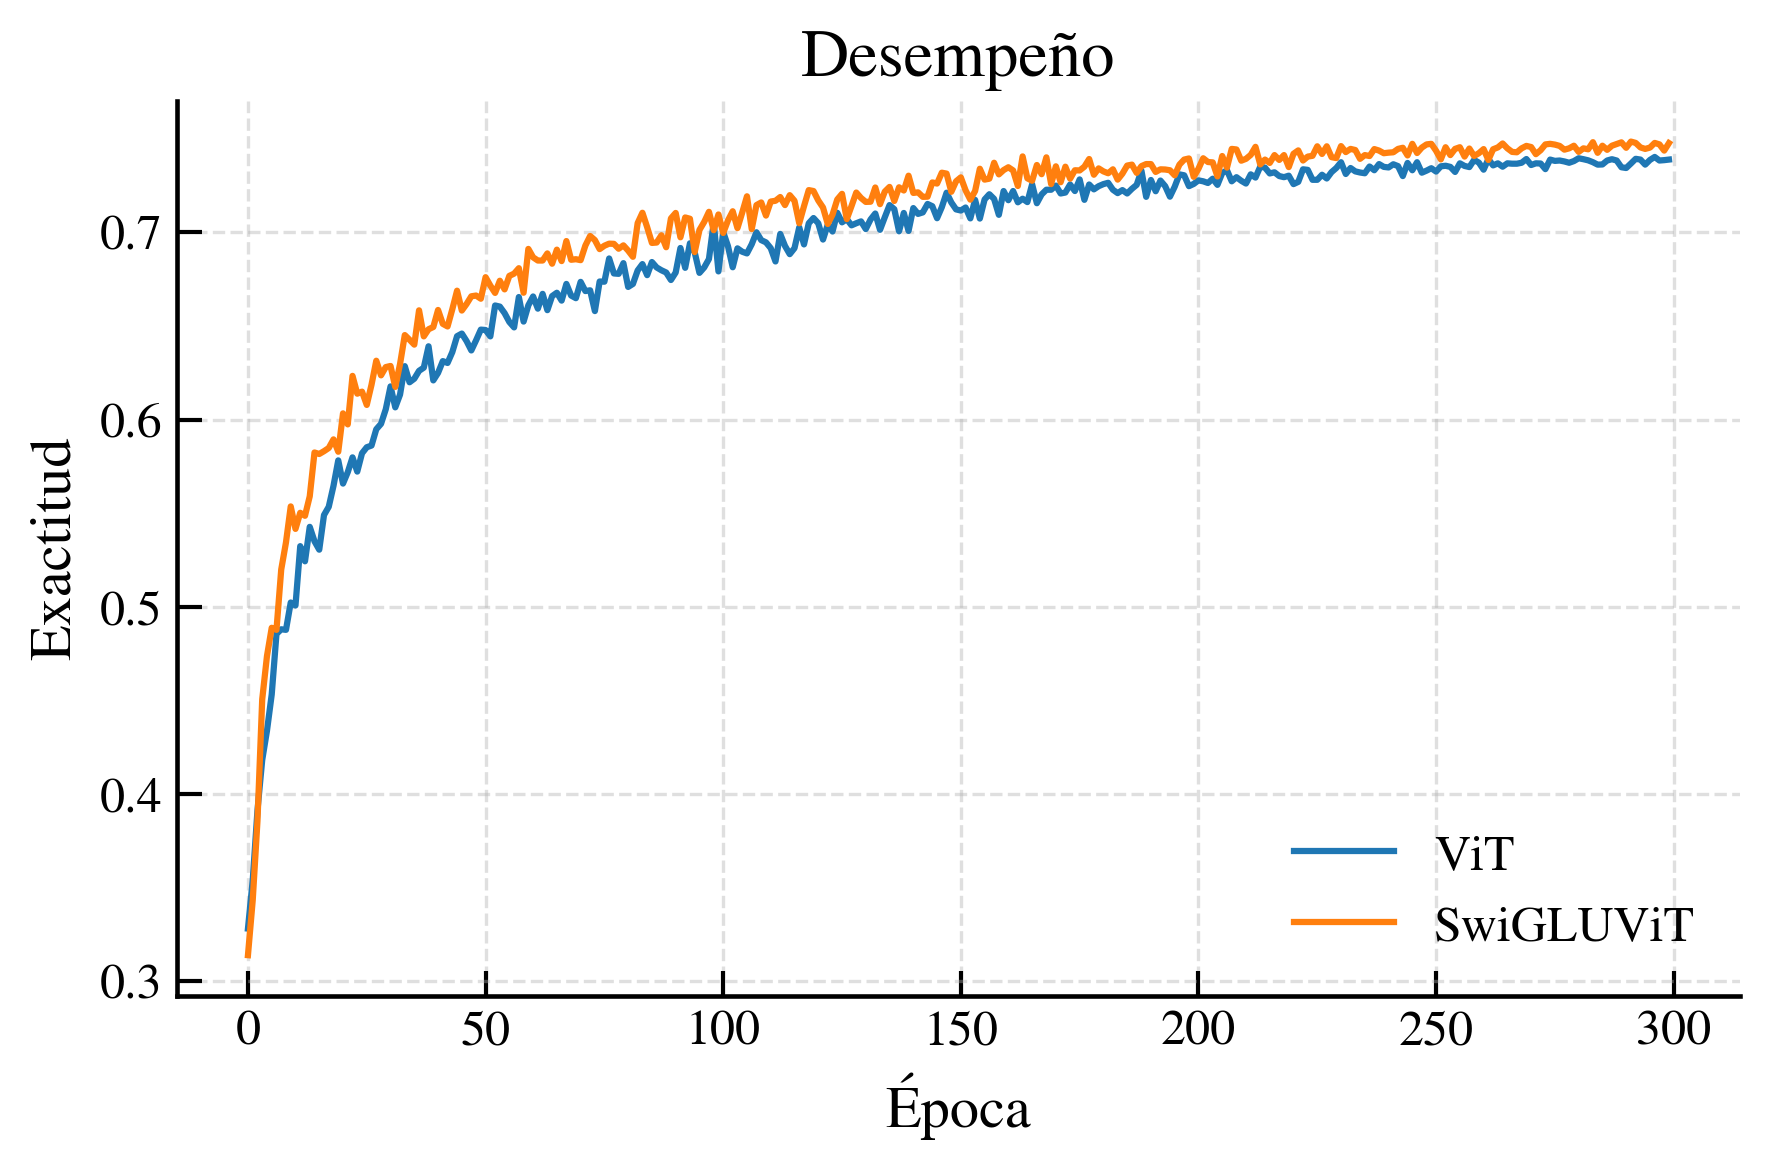

In [30]:
TEXT = {
    'es' : { 
        "xlabel": "Época",
        "ylabel": "Exactitud",
        "ViT"      : "ViT",
        "SwiGLUViT": "SwiGLUViT",
        'title' : "Desempeño"
    }
}
 
text = TEXT[LANGUAGE]
dataframe = {
    'ViT': read_csv(PATH['ViT']['S']),
    'SwiGLUViT': read_csv(PATH['SwiGLUViT']['S'])
}


figure, axes = subplots(figsize=(6, 4), dpi=300)
axes.grid(True, linestyle="--", alpha=0.4)
axes.tick_params(direction="in", length=6, width=1) 

axes.plot(
    dataframe['ViT'].loc[dataframe['ViT']['phase'] == 'evaluation']['epoch'],
    dataframe['ViT'].loc[dataframe['ViT']['phase'] == 'evaluation']['accuracy'],
    label=f"ViT"
)

axes.plot(
    dataframe['SwiGLUViT'].loc[dataframe['SwiGLUViT']['phase'] == 'evaluation']['epoch'],
    dataframe['SwiGLUViT'].loc[dataframe['SwiGLUViT']['phase'] == 'evaluation']['accuracy'],
    label=f"SwiGLUViT"
)

axes.set_xlabel(text['xlabel'])
axes.set_ylabel(text['ylabel'])
axes.legend(frameon=False) 
axes.set_title(text['title'])
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

figure.tight_layout()
show(figure)
close(figure)